In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

unidf=pd.read_csv(r"C:\Users\hajar\Time-Series-Crime-Forecasting-Minneapolis-3\data\Univ_Date.csv")

## SARIMA
1. Split the data into a train and test using time-based splitting
2. Check Assumptions and make corrections if needed
3. Select ARIMA Model
4. Select Best ARIMA Model
4. Interpret

### Split Data

Partition the data set into 4 parts corresponding to 2019-2024. then create nested training sets.

In [288]:
#Validation Set

#sort Data
unidf=unidf.set_index('Date')
unidf=unidf.sort_index()

unidf.reset_index()
unidf['date']=unidf.index
unidf['date'] = pd.to_datetime(unidf['date'], format='%Y-%m-%d')
unidf

Crime_Count       date
Date                              
2019-01-01           88 2019-01-01
2019-01-02          102 2019-01-02
2019-01-03          133 2019-01-03
2019-01-04           95 2019-01-04
2019-01-05           83 2019-01-05
...                 ...        ...
2025-03-06           89 2025-03-06
2025-03-07           89 2025-03-07
2025-03-08           70 2025-03-08
2025-03-09           80 2025-03-09
2025-03-10           50 2025-03-10

[2261 rows x 2 columns]

In [289]:
#Divide Data into 4 pairs of train and test sets

#SET1:
train1_range = pd.date_range(start='2019-3-1', end='2020-2-29')
train1 = unidf[unidf['date'].isin(train1_range)]

test_range = pd.date_range(start='2019-3-1', end='2020-2-29')
test1 = unidf[(unidf['date'].dt.year ==2020 ) & (unidf['date'].dt.month ==3)]


#SET2:
train2_range = pd.date_range(start='2020-3-1', end='2021-2-28')
train2 = unidf[unidf['date'].isin(train2_range)]
test2 = unidf[(unidf['date'].dt.year ==2021 ) & (unidf['date'].dt.month ==3)]


#SET3:
train3_range = pd.date_range(start='2021-3-1', end='2022-2-28')
train3 = unidf[unidf['date'].isin(train3_range)]
test3 = unidf[(unidf['date'].dt.year ==2022 ) & (unidf['date'].dt.month ==3)]


#SET4:
train4_range = pd.date_range(start='2022-3-1', end='2023-2-28')
train4 = unidf[unidf['date'].isin(train4_range)]
test4 = unidf[(unidf['date'].dt.year ==2023 ) & (unidf['date'].dt.month ==3)]


#SET5:
train5_range = pd.date_range(start='2023-3-1', end='2024-3-29')
train5 = unidf[unidf['date'].isin(train5_range)]
test5 = unidf[(unidf['date'].dt.year ==2024 ) & (unidf['date'].dt.month ==3)]




## STEP 1: Set 1 2019-2021
### Checking Stationarity


Text(0, 0.5, '\nNumber of Reported Crimes\n')

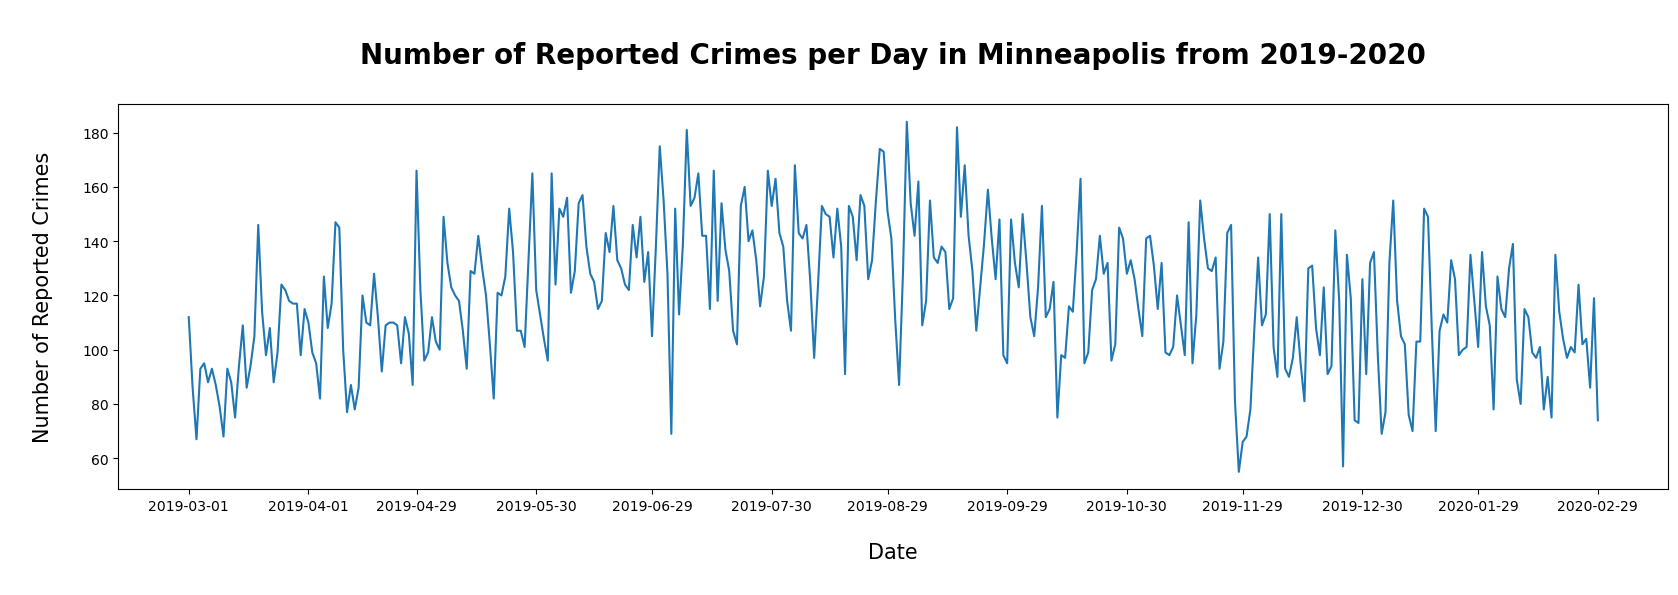

In [290]:
#Look at plot
fig, ax=plt.subplots(figsize=(20, 5))
plt.plot(train1.Crime_Count); 
# plt.xticks(rotation=10, fontsize=15)

months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

ax.set_title("\nNumber of Reported Crimes per Day in Minneapolis from 2019-2020\n",weight='bold',fontdict={'fontsize':20})
ax.set_xlabel("\nDate\n",fontdict={'fontsize':15})
ax.set_ylabel("\nNumber of Reported Crimes\n",fontdict={'fontsize':15})



In [291]:
#ADF Test
# Perform Augmented Dickey-Fuller test
result = adfuller(train1['Crime_Count'])

# Extract and print the test statistics and p-value
test_statistic = result[0]
p_value = result[1]
print(f"Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")

Test Statistic: -2.1650656173778726
P-value: 0.2191679740788734


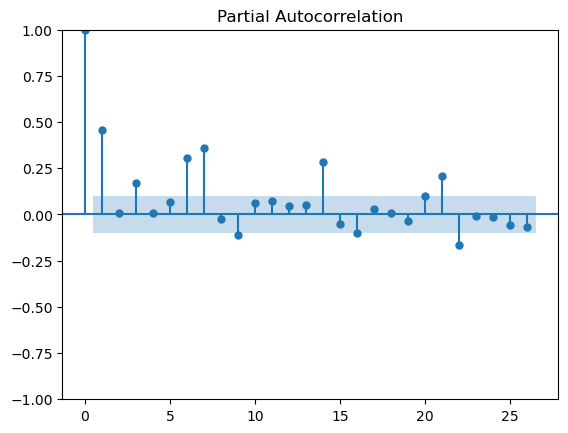

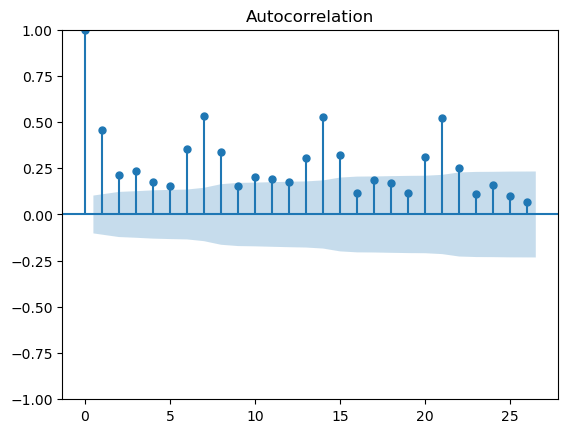

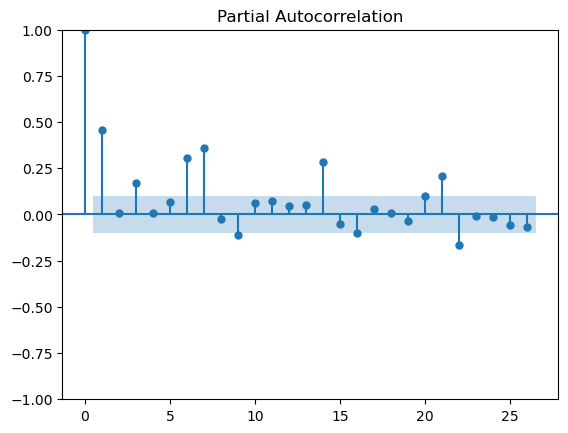

In [292]:
#ACF
plot_acf(train1.Crime_Count.dropna())
#PACF
plot_pacf(train1.Crime_Count.dropna())

### Check for Seasonality

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

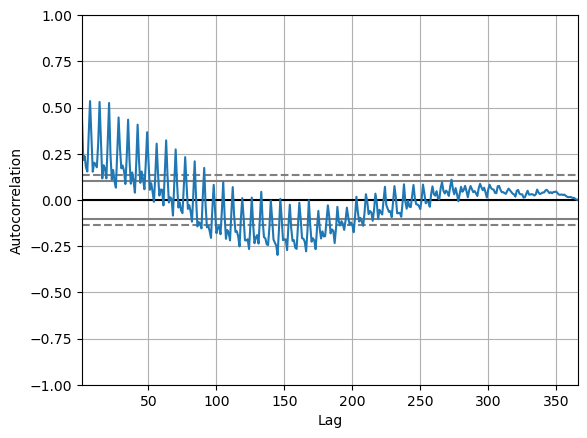

In [293]:
#Autocorrelation
autocorrelation_plot(train1['Crime_Count'])

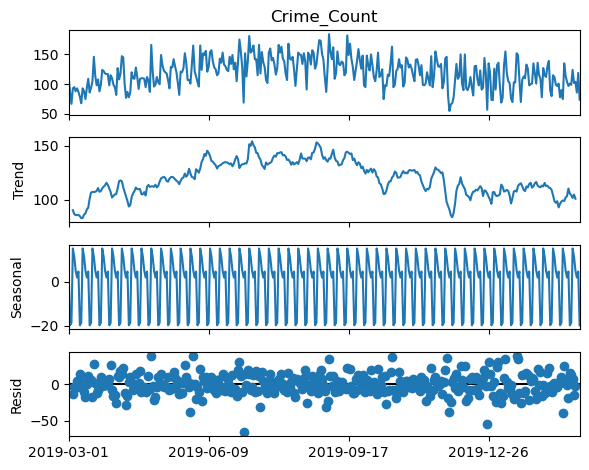

In [294]:
decomposition=seasonal_decompose(train1['Crime_Count'],model='additive',period=7)
decomposition.plot()
plt.xticks(ticks=range(0, len(train1), 100))
plt.show()

### Seasonal Differencing

In [295]:
train1s1= train1.copy()
train1s1['Crime_Count']=train1['Crime_Count'] - train1['Crime_Count'].shift(7)


In [296]:
train1s1=train1s1.dropna()
train1s1

Crime_Count       date
Date                              
2019-03-08        -25.0 2019-03-08
2019-03-09         -7.0 2019-03-09
2019-03-10          1.0 2019-03-10
2019-03-11          0.0 2019-03-11
2019-03-12         -7.0 2019-03-12
...                 ...        ...
2020-02-25        -33.0 2020-02-25
2020-02-26        -10.0 2020-02-26
2020-02-27        -18.0 2020-02-27
2020-02-28         22.0 2020-02-28
2020-02-29        -27.0 2020-02-29

[359 rows x 2 columns]

Text(0, 0.5, '\nNumber of Reported Crimes\n')

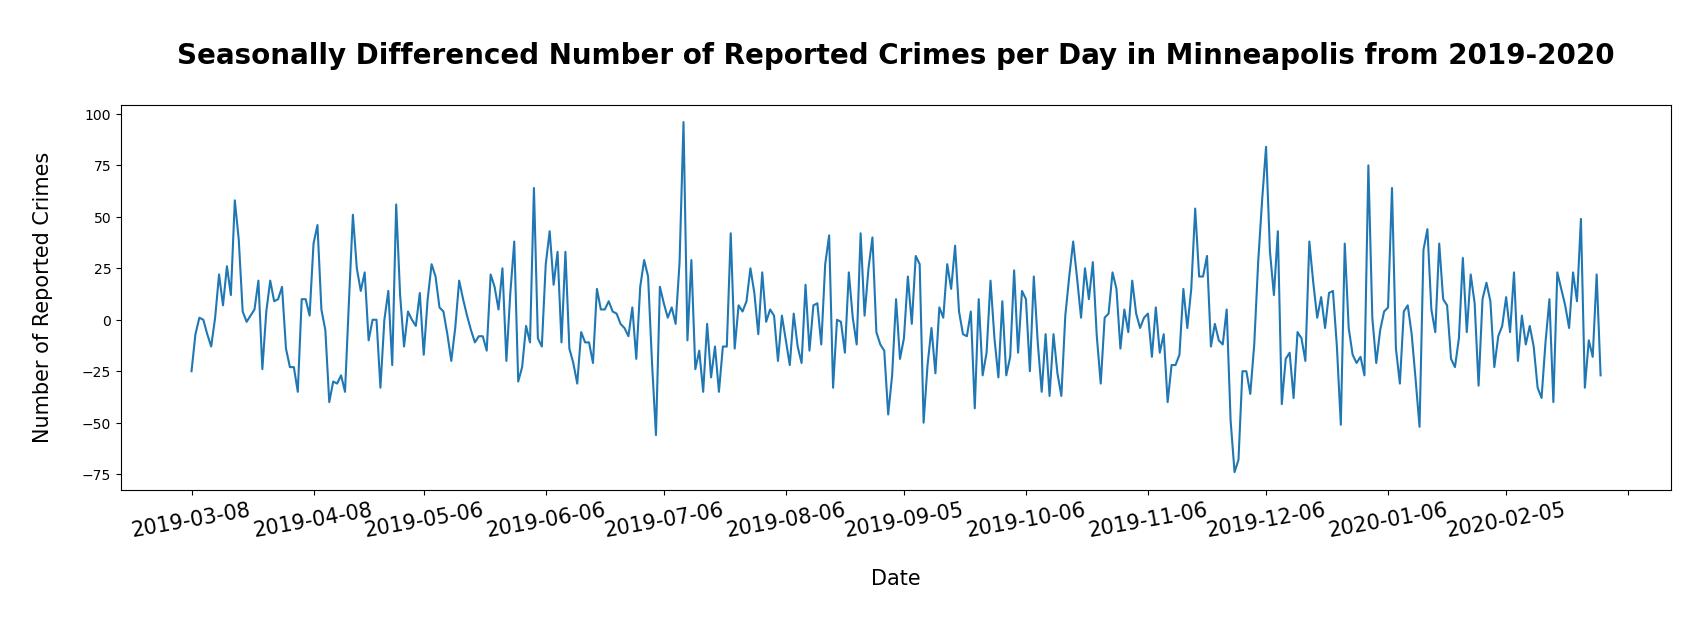

In [297]:
#Look at plot

fig, ax=plt.subplots(figsize=(20, 5))
plt.plot(train1s1.Crime_Count); 
plt.xticks(rotation=10, fontsize=15)

months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

ax.set_title("\nSeasonally Differenced Number of Reported Crimes per Day in Minneapolis from 2019-2020\n",weight='bold',fontdict={'fontsize':20})
ax.set_xlabel("\nDate\n",fontdict={'fontsize':15})
ax.set_ylabel("\nNumber of Reported Crimes\n",fontdict={'fontsize':15})

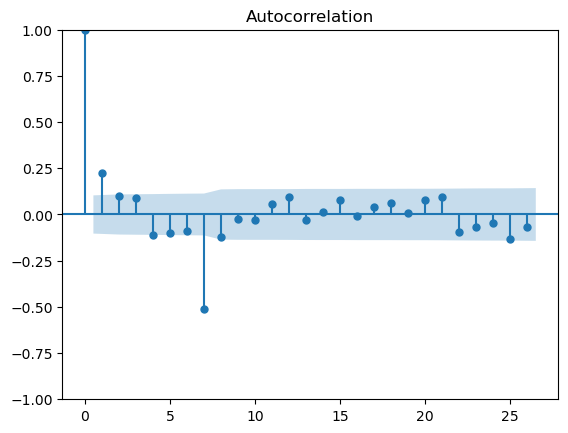

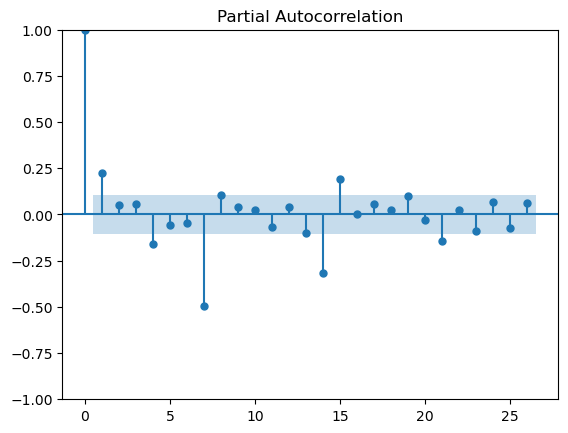

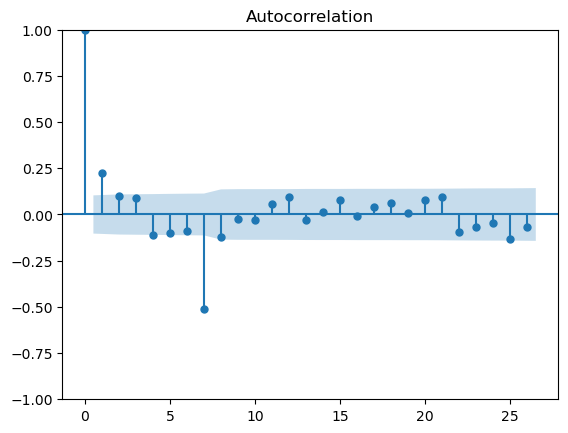

In [298]:
plot_pacf(train1s1.Crime_Count)
plot_acf(train1s1.Crime_Count)

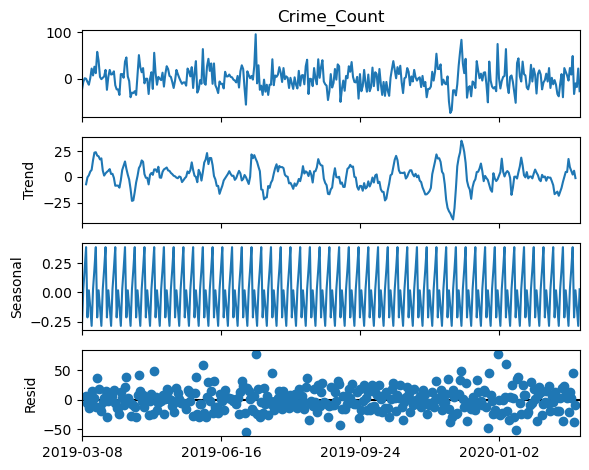

In [299]:
# Trying Differencing of 7
decomposition=seasonal_decompose(train1s1['Crime_Count'],model='additive',period=7)
decomposition.plot()
plt.xticks(ticks=range(0, len(train1), 100))
plt.show()

In [300]:
#ADF Test

# Perform Augmented Dickey-Fuller test
result = adfuller(train1s1['Crime_Count'])

# Extract and print the test statistics and p-value
test_statistic = result[0]
p_value = result[1]
print(f"Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")

Test Statistic: -6.484784506463984
P-value: 1.2688298362252203e-08


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

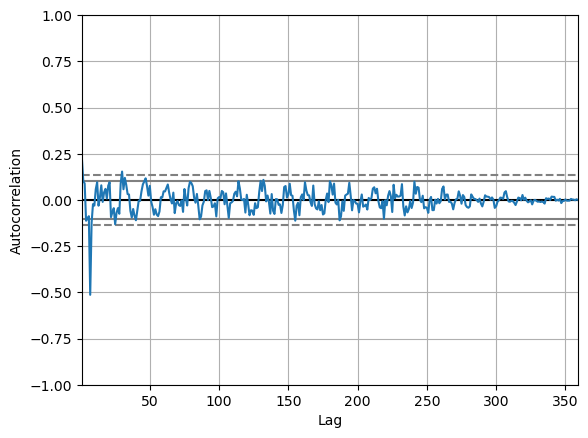

In [301]:
autocorrelation_plot(train1s1['Crime_Count'])

### Determine parameters and Fit Model

In [302]:
#SELECT PARAMETERS using All Subset Selection (AIC)
from itertools import product


def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in parameters_list:
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(dis=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True)
    return result_df




p = range(0, 2, 1)
d = 0
q = range(0, 2, 1)
P = range(0, 2, 1)
D = 1
Q = range(0, 2, 1)
s = 7

parameters = product(p, q, P, Q)
parameters_list = list(parameters)

result_df = optimize_SARIMA(parameters_list, d, D, s, train1s1['Crime_Count'])
result_df


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be 

(p,q)x(P,Q)          AIC
11  (1, 0, 1, 1)  3149.327086
15  (1, 1, 1, 1)  3150.952375
7   (0, 1, 1, 1)  3151.236689
3   (0, 0, 1, 1)  3168.966826
9   (1, 0, 0, 1)  3254.349550
13  (1, 1, 0, 1)  3255.247814
5   (0, 1, 0, 1)  3256.254698
1   (0, 0, 0, 1)  3270.712388
10  (1, 0, 1, 0)  3405.126506
6   (0, 1, 1, 0)  3406.080750
14  (1, 1, 1, 0)  3406.896009
2   (0, 0, 1, 0)  3418.565664
8   (1, 0, 0, 0)  3611.660627
12  (1, 1, 0, 0)  3612.194201
4   (0, 1, 0, 0)  3613.518621
0   (0, 0, 0, 0)  3627.577241

In [303]:
mod1 = SARIMAX(train1s1['Crime_Count'], order=(1,0,0), seasonal_order=(1,1,1,7)).fit(dis=-1)
my_model=SARIMAX(train1s1['Crime_Count'], order=(1, 0, 1), seasonal_order=(0, 1, 1, 7)).fit(dis=-1)
print(f'My Model AIC: {my_model.aic} and the Optimized Model AIC: {mod1.aic}')
print(mod1.summary())


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be 

My Model AIC: 3255.247814148482 and the Optimized Model AIC: 3149.327086186152
                                      SARIMAX Results                                      
Dep. Variable:                         Crime_Count   No. Observations:                  359
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 7)   Log Likelihood               -1570.664
Date:                             Tue, 01 Apr 2025   AIC                           3149.327
Time:                                     16:53:52   BIC                           3164.782
Sample:                                 03-08-2019   HQIC                          3155.477
                                      - 02-29-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2444      

### Model Diagnostics

Figure(640x480)


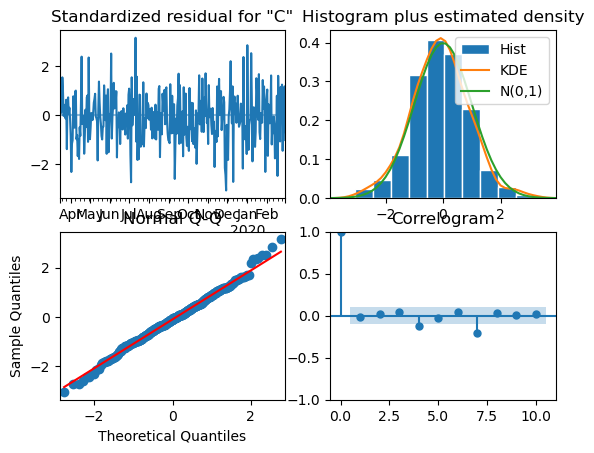

In [ ]:
#Model DIAGNOSTICS AND SUMMARY
print(mod1.plot_diagnostics(figsize=(10, 10)))

### Calculate MAE RMSE MAPE MASE

In [305]:
#MEASURE PERFORMACE METRICS

fcast_len = len(test1)
fcast = mod1.forecast(fcast_len)

mse1 = mean_squared_error(test1['Crime_Count'], fcast)
rmse1 = np.sqrt(mse1)
mae1 = mean_absolute_error(test1['Crime_Count'], fcast)
mape1= mean_absolute_percentage_error(test1['Crime_Count'], fcast)

print(f'Mean Squared Error: {mse1}')
print(f'Root Mean Squared Error: {rmse1}')
print(f'Mean Absolute Error: {mae1}')
print(f'Mean Absolute Percentage Error: {mape1}')



Mean Squared Error: 12206.682766676047
Root Mean Squared Error: 110.48385749364496
Mean Absolute Error: 108.03165379190258
Mean Absolute Percentage Error: 0.9986334339616646


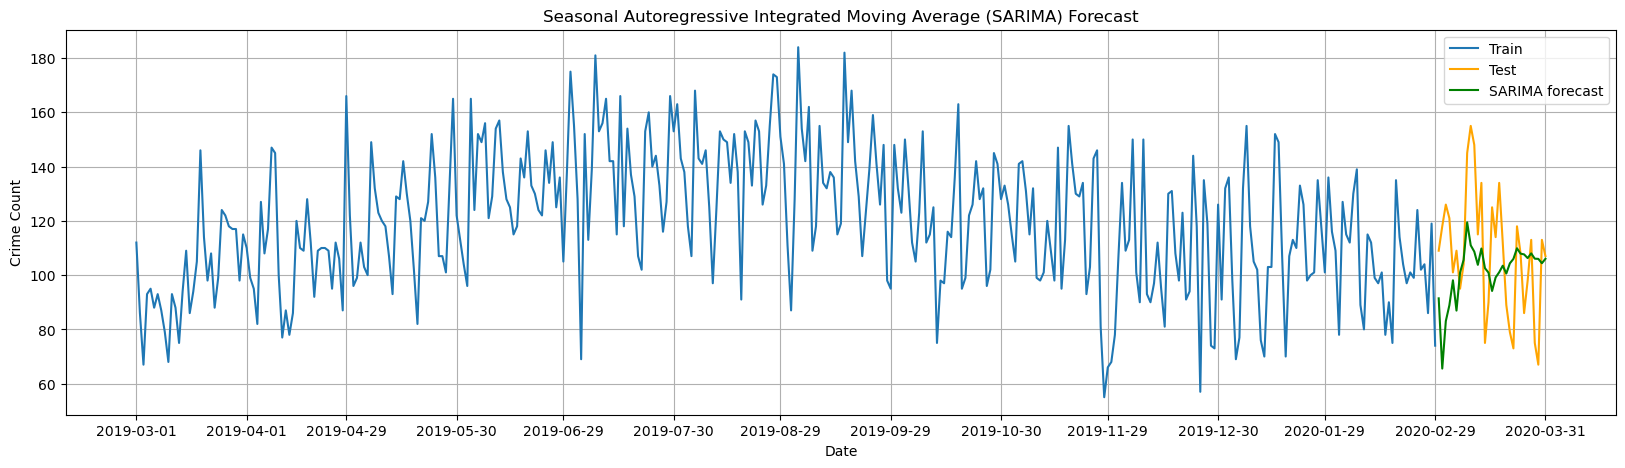

In [306]:
# Ensure the index is a DateTime index for proper alignment

y_hat_sarima = test1.copy()
y_hat_sarima['sarima_forecast'] = fcast.values

# Reverse differencing: cumulatively sum and add back last known value
y_hat_sarima['sarima_forecast'] = train1['Crime_Count'].iloc[-7] + y_hat_sarima['sarima_forecast'].cumsum()

fig, ax=plt.subplots(figsize=(20, 5))
plt.grid(True)

# Plot the training data
plt.plot(train1['Crime_Count'], label='Train')

# Plot the test data
plt.plot(test1['Crime_Count'], label='Test', color='orange')

# Plot the SARIMA forecast for the test period
plt.plot(y_hat_sarima['sarima_forecast'], label='SARIMA forecast', color='green')

months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

plt.legend(loc='best')
plt.title('Seasonal Autoregressive Integrated Moving Average (SARIMA) Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')

# Show the plot
plt.show()




## Repeat FOR STEP 2: Set 2 2019-2021

Text(0, 0.5, '\nNumber of Reported Crimes\n')

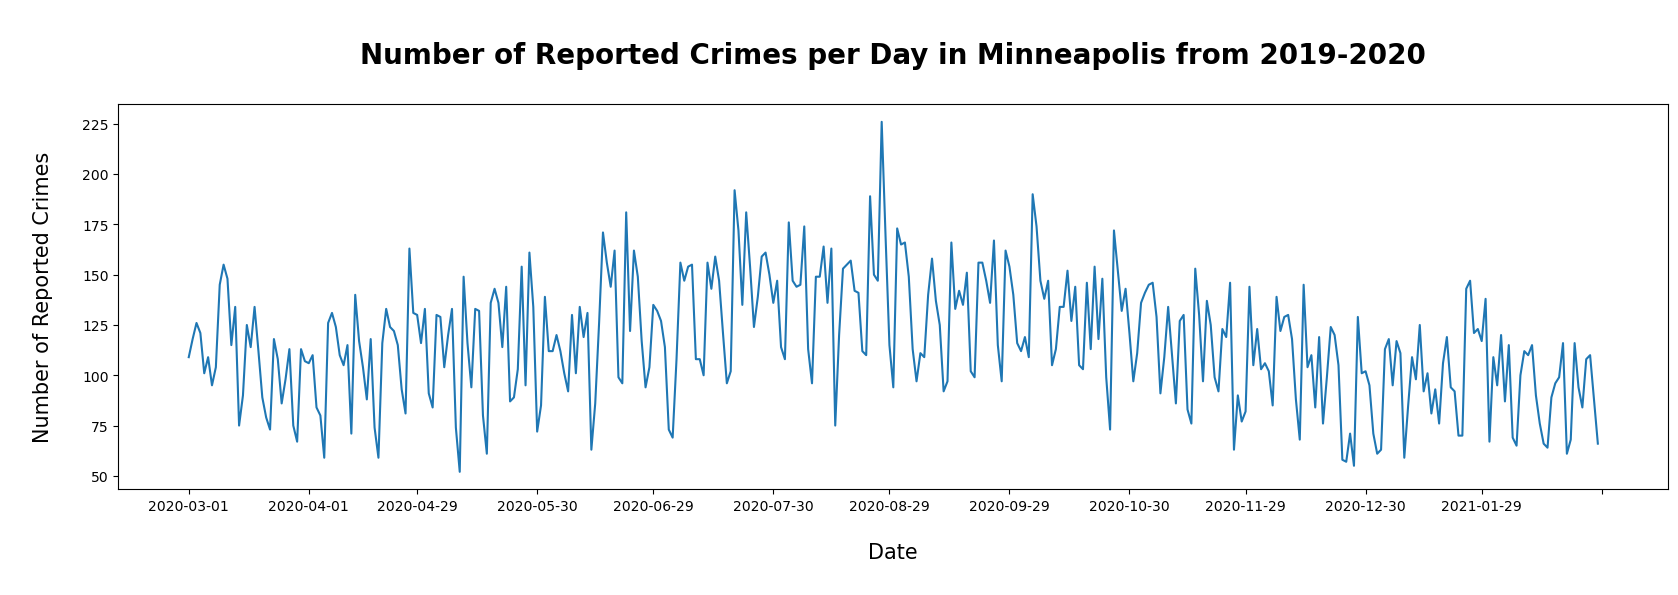

In [307]:
# PLOT
ax.clear()
fig, ax=plt.subplots(figsize=(20, 5))
plt.plot(train2.Crime_Count); 
# plt.xticks(rotation=10, fontsize=15)

months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

ax.set_title("\nNumber of Reported Crimes per Day in Minneapolis from 2019-2020\n",weight='bold',fontdict={'fontsize':20})
ax.set_xlabel("\nDate\n",fontdict={'fontsize':15})
ax.set_ylabel("\nNumber of Reported Crimes\n",fontdict={'fontsize':15})


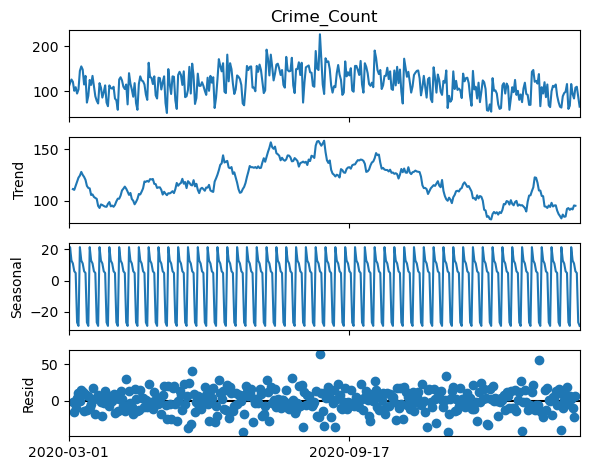

In [308]:
#CHECK STATIONARITY and SEASONALITY
decomposition=seasonal_decompose(train2['Crime_Count'],model='additive',period=7)
decomposition.plot()
plt.xticks(ticks=range(0, len(train2), 200))
plt.show()


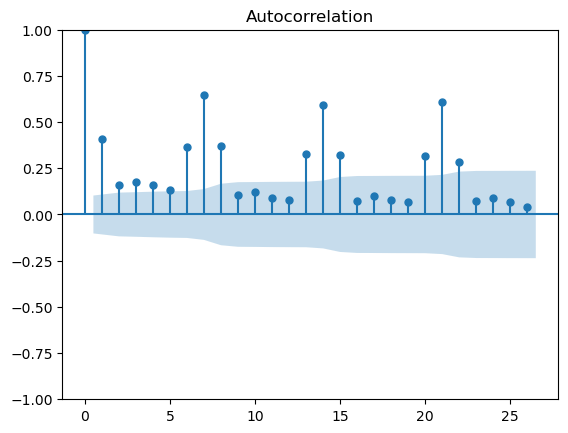

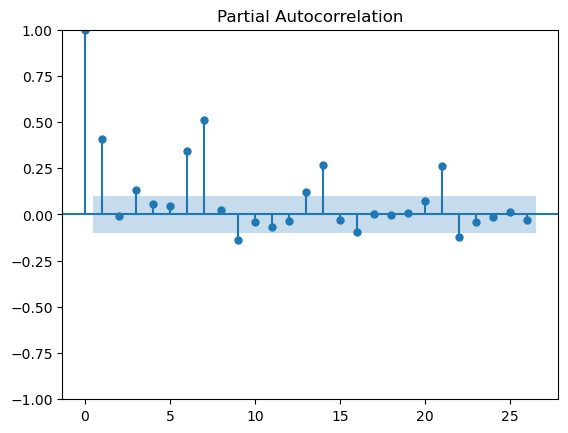

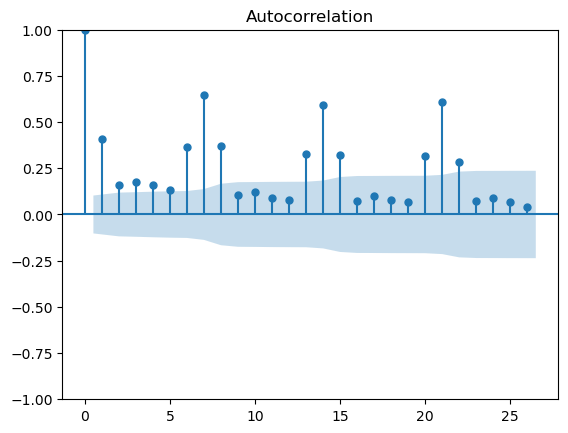

In [309]:
plot_pacf(train2.Crime_Count)
plot_acf(train2.Crime_Count)

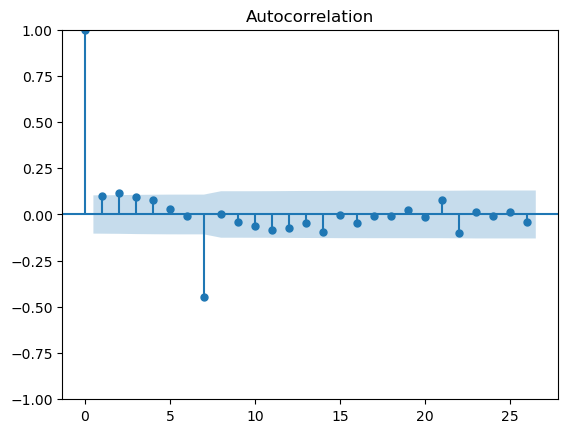

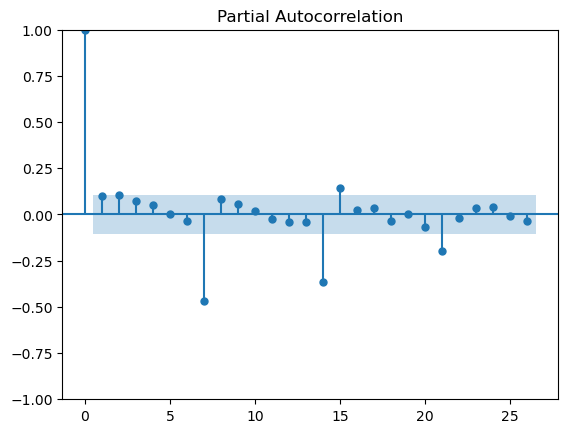

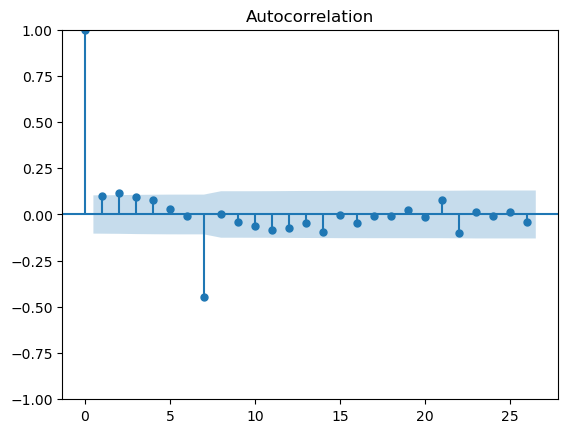

In [310]:
#DIFFERENCE
train2s1= train2.copy()
train2s1['Crime_Count']=train2['Crime_Count'] - train2['Crime_Count'].shift(7)
train2s1=train2s1.dropna()

plot_pacf(train2s1.Crime_Count)
plot_acf(train2s1.Crime_Count)

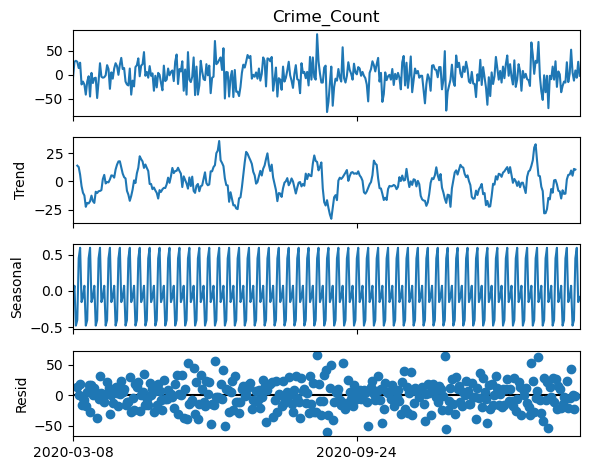

In [311]:
decomposition=seasonal_decompose(train2s1['Crime_Count'],model='additive',period=7)
decomposition.plot()
plt.xticks(ticks=range(0, len(train2s1), 200))
plt.show()

In [312]:
p = range(0, 2, 1)
d = 0
q = range(0, 4, 1)
P = range(0, 2, 1)
D = 1
Q = range(0, 2, 1)
s = 7

parameters = product(p, q, P, Q)
parameters_list = list(parameters)

result_df = optimize_SARIMA(parameters_list, d, D, s, train2s1['Crime_Count'])
result_df

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be 

(p,q)x(P,Q)          AIC
27  (1, 2, 1, 1)  3205.536086
31  (1, 3, 1, 1)  3205.624502
23  (1, 1, 1, 1)  3206.192580
15  (0, 3, 1, 1)  3210.785151
11  (0, 2, 1, 1)  3212.566166
19  (1, 0, 1, 1)  3214.946078
7   (0, 1, 1, 1)  3216.668713
3   (0, 0, 1, 1)  3220.549365
9   (0, 2, 0, 1)  3289.700517
13  (0, 3, 0, 1)  3290.303443
17  (1, 0, 0, 1)  3290.529689
29  (1, 3, 0, 1)  3290.807687
5   (0, 1, 0, 1)  3291.162490
1   (0, 0, 0, 1)  3292.153184
25  (1, 2, 0, 1)  3293.620081
21  (1, 1, 0, 1)  3295.258333
30  (1, 3, 1, 0)  3457.117414
26  (1, 2, 1, 0)  3457.962079
14  (0, 3, 1, 0)  3460.999356
10  (0, 2, 1, 0)  3461.078668
18  (1, 0, 1, 0)  3463.373325
6   (0, 1, 1, 0)  3464.160909
2   (0, 0, 1, 0)  3465.189621
22  (1, 1, 1, 0)  3468.837496
28  (1, 3, 0, 0)  3571.904482
20  (1, 1, 0, 0)  3614.668380
0   (0, 0, 0, 0)  3630.975781
16  (1, 0, 0, 0)  3631.240522
8   (0, 2, 0, 0)  3631.372265
4   (0, 1, 0, 0)  3631.481680
24  (1, 2, 0, 0)  3631.948781
12  (0, 3, 0, 0)  3632.881808

In [ ]:
mod2 = SARIMAX(train2s1['Crime_Count'], order=(1,0,2), seasonal_order=(1,1,1,7)).fit(dis=-1)
my_model=SARIMAX(train2s1['Crime_Count'], order=(1, 0, 3), seasonal_order=(0, 1, 1, 7)).fit(dis=-1)
print(f'My Model AIC: {my_model.aic} and the Optimized Model AIC: {mod2.aic}')
print(mod1.summary())

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  w

My Model AIC: 3290.8076869176552 and the Optimized Model AIC: 3206.1925803573968
                                      SARIMAX Results                                      
Dep. Variable:                         Crime_Count   No. Observations:                  359
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 7)   Log Likelihood               -1570.664
Date:                             Tue, 01 Apr 2025   AIC                           3149.327
Time:                                     16:54:08   BIC                           3164.782
Sample:                                 03-08-2019   HQIC                          3155.477
                                      - 02-29-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2444    

Figure(640x480)


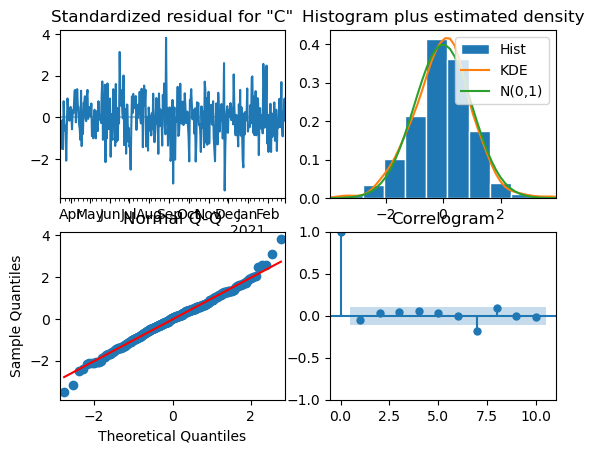

In [ ]:
print(mod2.plot_diagnostics(figsize=(10, 10)))

In [315]:
#FIT MODEL AND CALCULATE MSE

fcast_len = len(test2)
fcast = mod2.forecast(fcast_len)

mse2 = mean_squared_error(test2['Crime_Count'], fcast)
rmse2 = np.sqrt(mse2)
mae2 = mean_absolute_error(test2['Crime_Count'], fcast)
mape2= mean_absolute_percentage_error(test2['Crime_Count'], fcast)

print(f'Mean Squared Error: {mse2}')
print(f'Root Mean Squared Error: {rmse2}')
print(f'Mean Absolute Error: {mae2}')
print(f'Mean Absolute Percentage Error: {mape2}')

Mean Squared Error: 8634.99429440735
Root Mean Squared Error: 92.92466999891552
Mean Absolute Error: 91.18218493820306
Mean Absolute Percentage Error: 1.0144919226717382


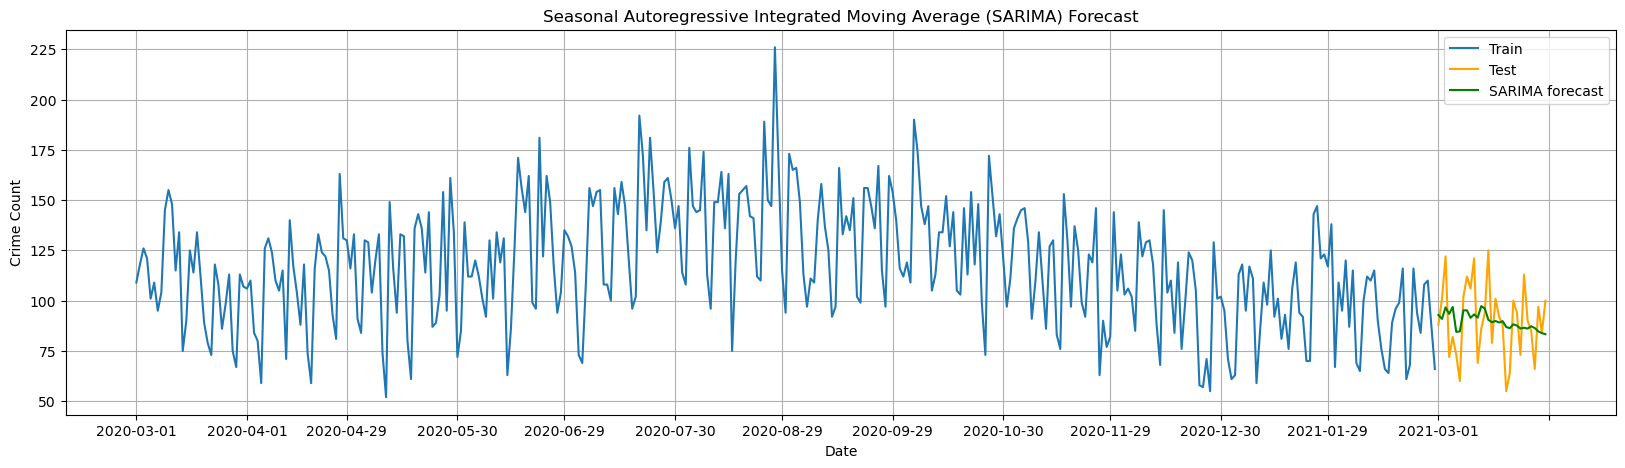

In [316]:
y_hat_sarima = test2.copy()
y_hat_sarima['sarima_forecast'] = fcast.values

# Reverse differencing: cumulatively sum and add back last known value
y_hat_sarima['sarima_forecast'] = train2['Crime_Count'].iloc[-7] + y_hat_sarima['sarima_forecast'].cumsum()

fig, ax=plt.subplots(figsize=(20, 5))
plt.grid(True)

# Plot the training data
plt.plot(train2['Crime_Count'], label='Train')

# Plot the test data
plt.plot(test2['Crime_Count'], label='Test', color='orange')

# Plot the SARIMA forecast for the test period
plt.plot(y_hat_sarima['sarima_forecast'], label='SARIMA forecast', color='green')

months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

plt.legend(loc='best')
plt.title('Seasonal Autoregressive Integrated Moving Average (SARIMA) Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')

# Show the plot
plt.show()


## REAPEAT FOR STEP 3: Set 3 2019-2022

Text(0, 0.5, '\nNumber of Reported Crimes\n')

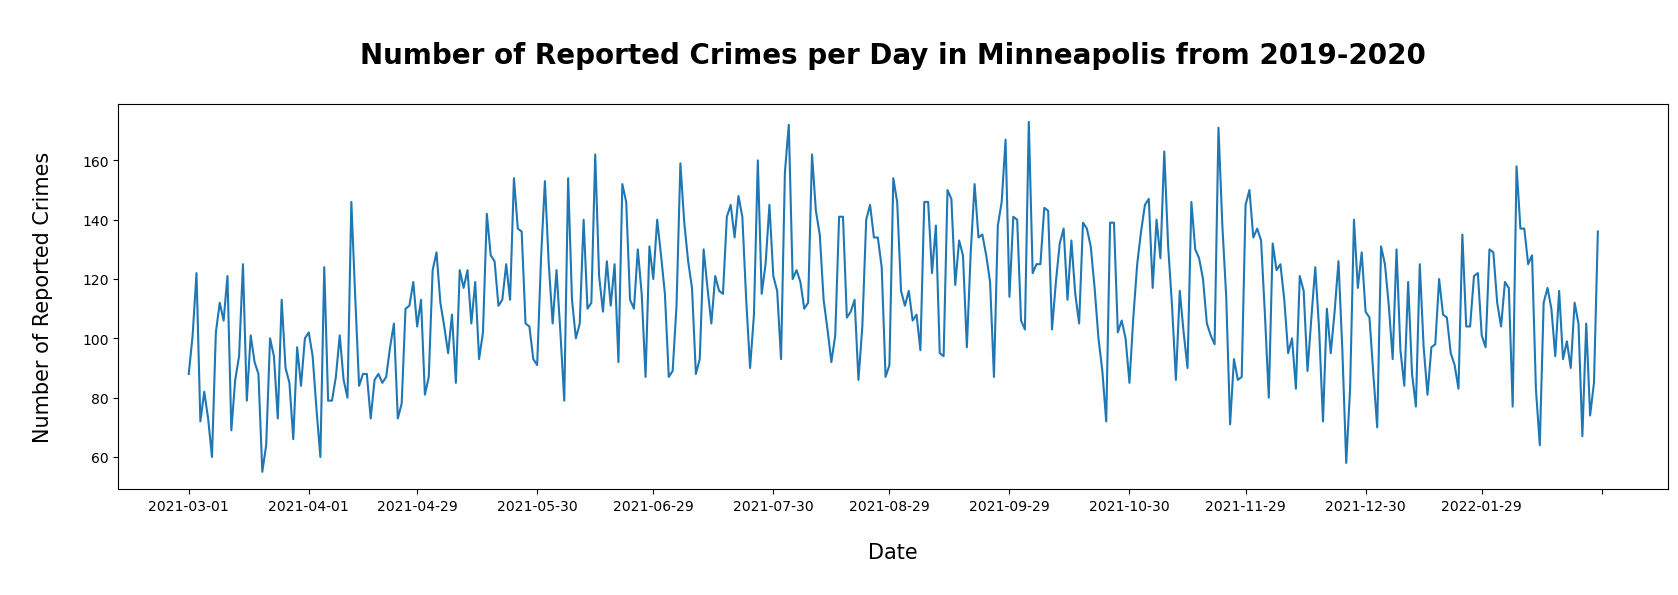

In [317]:
# #PLOT
ax.clear()
fig, ax=plt.subplots(figsize=(20, 5))
plt.plot(train3.Crime_Count); 
# plt.xticks(rotation=10, fontsize=15)

months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

ax.set_title("\nNumber of Reported Crimes per Day in Minneapolis from 2019-2020\n",weight='bold',fontdict={'fontsize':20})
ax.set_xlabel("\nDate\n",fontdict={'fontsize':15})
ax.set_ylabel("\nNumber of Reported Crimes\n",fontdict={'fontsize':15})



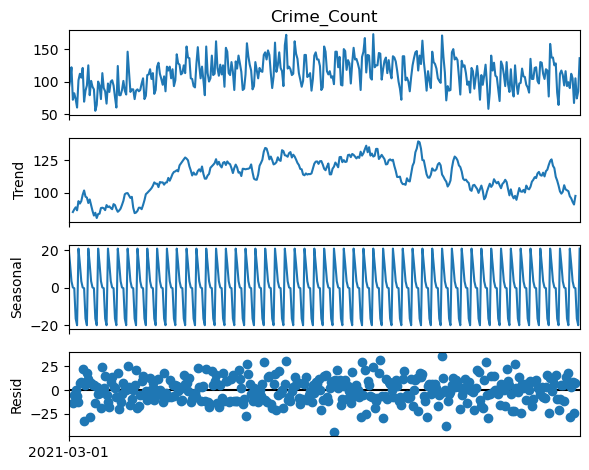

In [318]:
#CHECK STATIONARITY
decomposition=seasonal_decompose(train3['Crime_Count'],model='additive',period=7)
decomposition.plot()
plt.xticks(ticks=range(0, len(train3), 500))
plt.show()

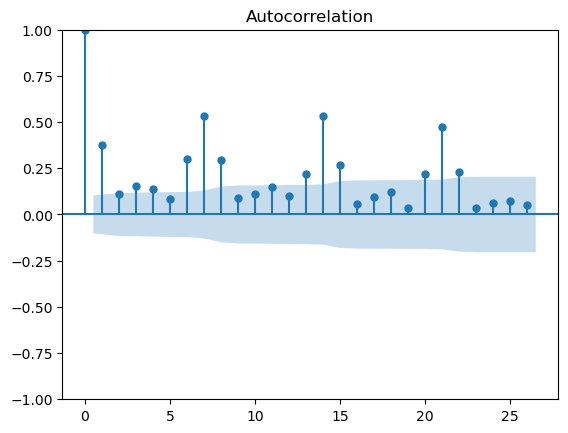

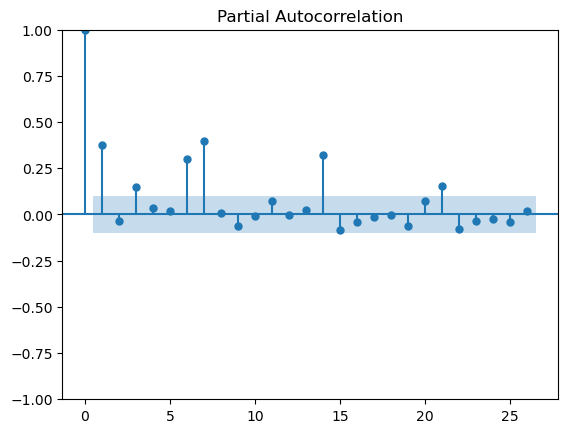

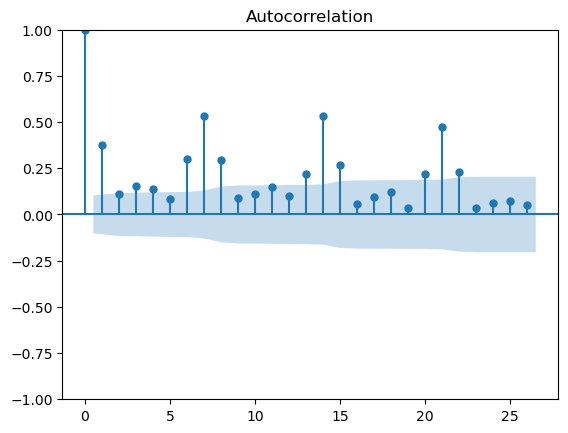

In [319]:
plot_pacf(train3.Crime_Count)
plot_acf(train3.Crime_Count)

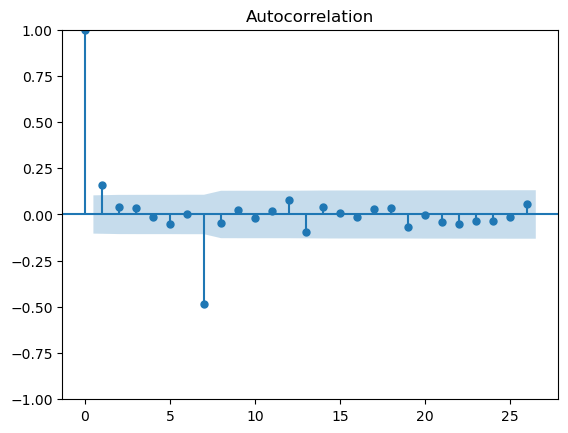

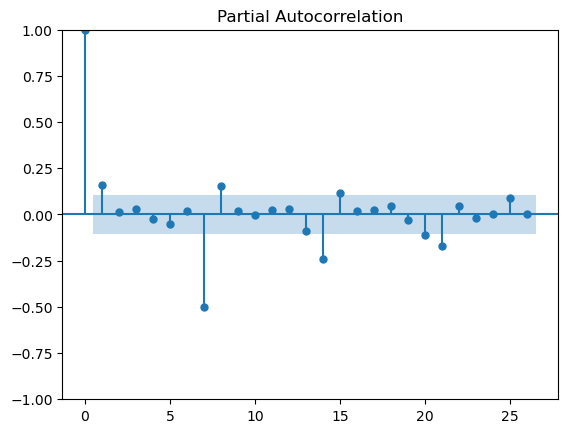

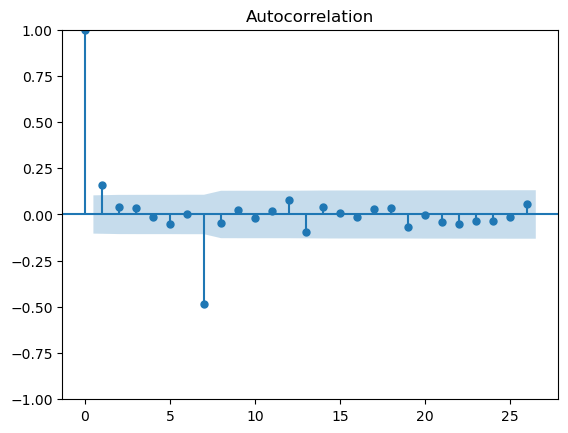

In [320]:
#DIFFERENCE
train3s1= train3.copy()
train3s1['Crime_Count']=train3['Crime_Count'] - train3['Crime_Count'].shift(7)
train3s1=train3s1.dropna()

plot_pacf(train3s1.Crime_Count)
plot_acf(train3s1.Crime_Count)

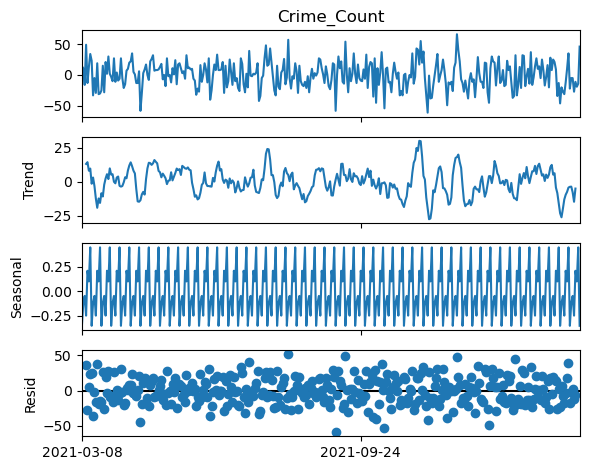

In [321]:
decomposition=seasonal_decompose(train3s1['Crime_Count'],model='additive',period=7)
decomposition.plot()
plt.xticks(ticks=range(0, len(train3s1), 200))
plt.show()

In [322]:
p = range(0, 4, 1)
d = 0
q = range(0, 4, 1)
P = range(0, 2, 1)
D = 1
Q = range(0, 2, 1)
s = 7

parameters = product(p, q, P, Q)
parameters_list = list(parameters)

result_df = optimize_SARIMA(parameters_list, d, D, s, train3s1['Crime_Count'])
result_df

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be 

(p,q)x(P,Q)          AIC
63  (3, 3, 1, 1)  3080.659325
19  (1, 0, 1, 1)  3087.721108
7   (0, 1, 1, 1)  3088.109478
23  (1, 1, 1, 1)  3089.654530
35  (2, 0, 1, 1)  3089.680956
..           ...          ...
0   (0, 0, 0, 0)  3543.001195
12  (0, 3, 0, 0)  3543.280547
48  (3, 0, 0, 0)  3543.319098
28  (1, 3, 0, 0)  3545.236080
52  (3, 1, 0, 0)  3545.285140

[64 rows x 2 columns]

In [323]:
mod3 = SARIMAX(train3s1['Crime_Count'], order=(2,0,3), seasonal_order=(1,1,1,7)).fit(dis=-1)
my_model=SARIMAX(train3s1['Crime_Count'], order=(3, 0, 3), seasonal_order=(0, 1, 1, 7)).fit(dis=-1)
print(f'My Model AIC: {my_model.aic} and the Optimized Model AIC: {mod3.aic}')
print(mod1.summary())

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword argum

My Model AIC: 3146.3326358684903 and the Optimized Model AIC: 3094.0802067132245
                                      SARIMAX Results                                      
Dep. Variable:                         Crime_Count   No. Observations:                  359
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 7)   Log Likelihood               -1570.664
Date:                             Tue, 01 Apr 2025   AIC                           3149.327
Time:                                     16:54:42   BIC                           3164.782
Sample:                                 03-08-2019   HQIC                          3155.477
                                      - 02-29-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2444    

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Figure(640x480)


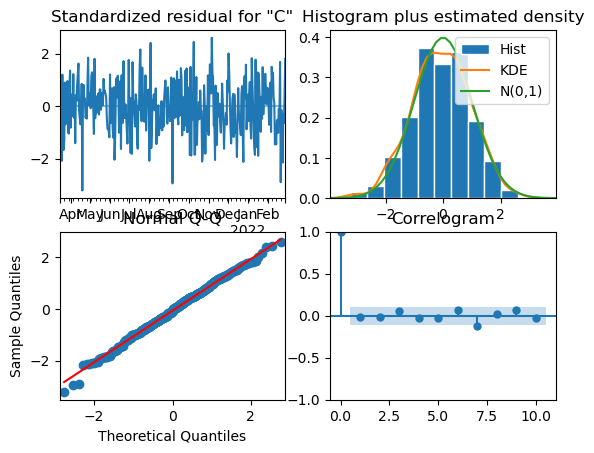

In [ ]:
print(mod3.plot_diagnostics(figsize=(10, 10)))

In [325]:
#FIT MODEL AND CALCULATE MSE
fcast_len = len(test3)
fcast = mod3.forecast(fcast_len)

mse3 = mean_squared_error(test3['Crime_Count'], fcast)
rmse3 = np.sqrt(mse3)
mae3 = mean_absolute_error(test3['Crime_Count'], fcast)
mape3= mean_absolute_percentage_error(test3['Crime_Count'], fcast)

print(f'Mean Squared Error: {mse3}')
print(f'Root Mean Squared Error: {rmse3}')
print(f'Mean Absolute Error: {mae3}')
print(f'Mean Absolute Percentage Error: {mape3}')

Mean Squared Error: 12046.03767489611
Root Mean Squared Error: 109.75444262031542
Mean Absolute Error: 107.74695226049423
Mean Absolute Percentage Error: 0.9927312186919843


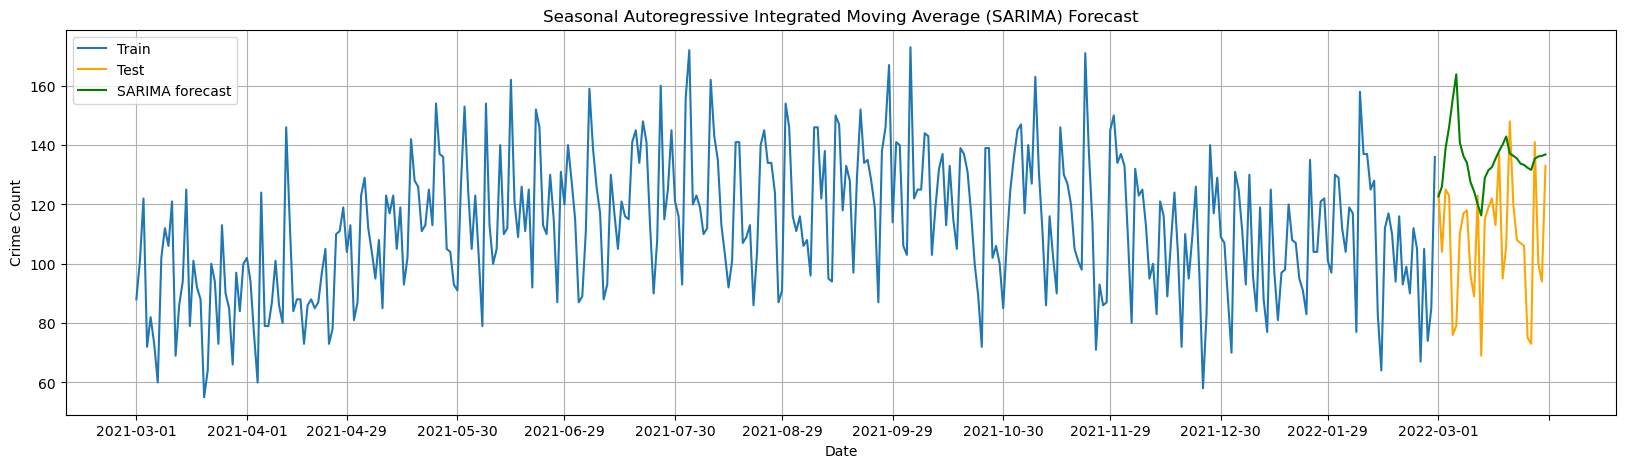

In [326]:
y_hat_sarima = test3.copy()
y_hat_sarima['sarima_forecast'] = fcast.values

# Reverse differencing: cumulatively sum and add back last known value
y_hat_sarima['sarima_forecast'] = train3['Crime_Count'].iloc[-7] + y_hat_sarima['sarima_forecast'].cumsum()

fig, ax=plt.subplots(figsize=(20, 5))
plt.grid(True)

# Plot the training data
plt.plot(train3['Crime_Count'], label='Train')

# Plot the test data
plt.plot(test3['Crime_Count'], label='Test', color='orange')

# Plot the SARIMA forecast for the test period
plt.plot(y_hat_sarima['sarima_forecast'], label='SARIMA forecast', color='green')

months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

plt.legend(loc='best')
plt.title('Seasonal Autoregressive Integrated Moving Average (SARIMA) Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')

# Show the plot
plt.show()

## REAPEAT FOR STEP 4: Set 4 2019-2023

Text(0, 0.5, '\nNumber of Reported Crimes\n')

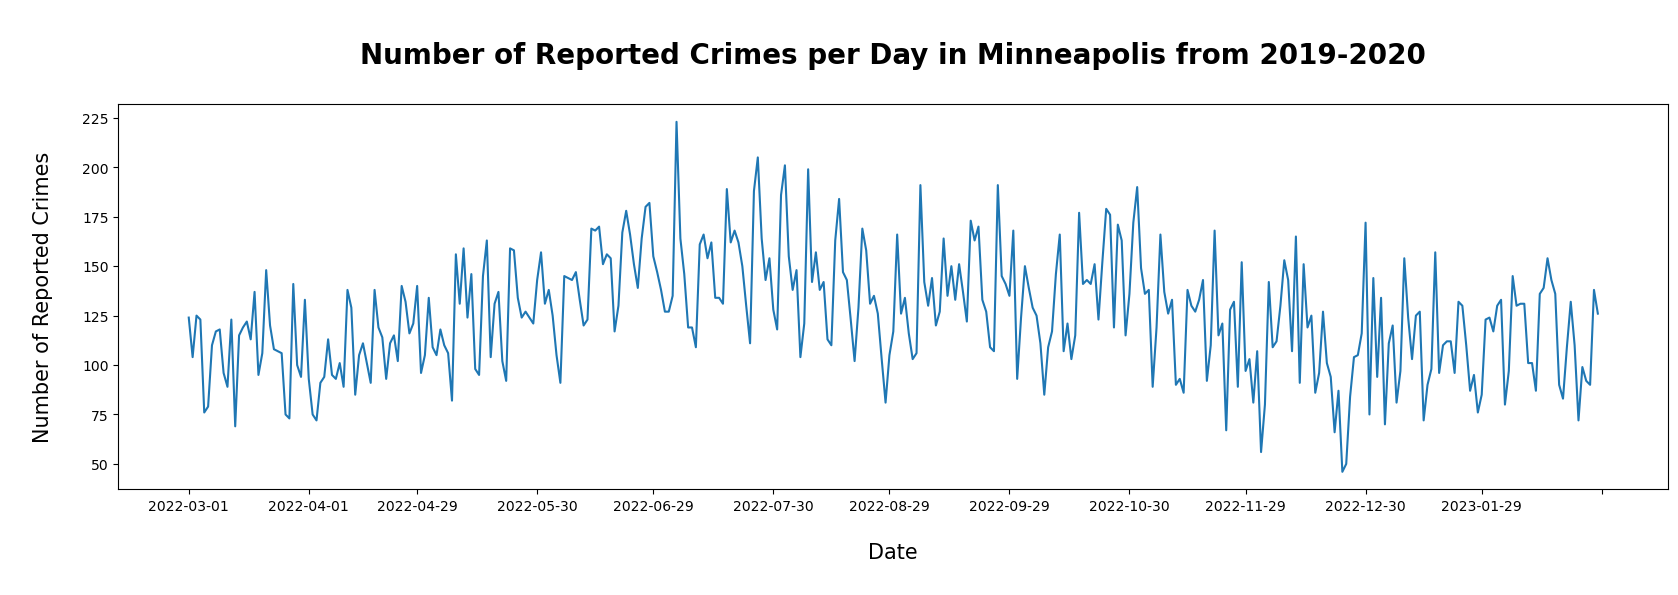

In [327]:
# #PLOT
ax.clear()
fig, ax=plt.subplots(figsize=(20, 5))
plt.plot(train4.Crime_Count); 
# plt.xticks(rotation=10, fontsize=15)

months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

ax.set_title("\nNumber of Reported Crimes per Day in Minneapolis from 2019-2020\n",weight='bold',fontdict={'fontsize':20})
ax.set_xlabel("\nDate\n",fontdict={'fontsize':15})
ax.set_ylabel("\nNumber of Reported Crimes\n",fontdict={'fontsize':15})



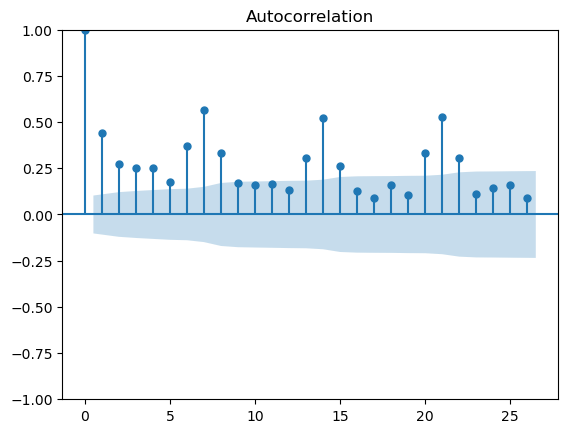

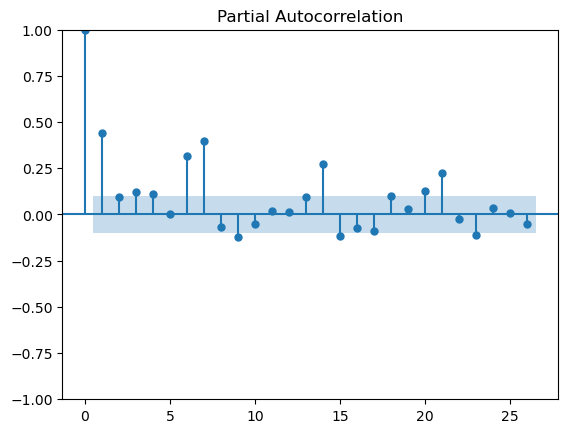

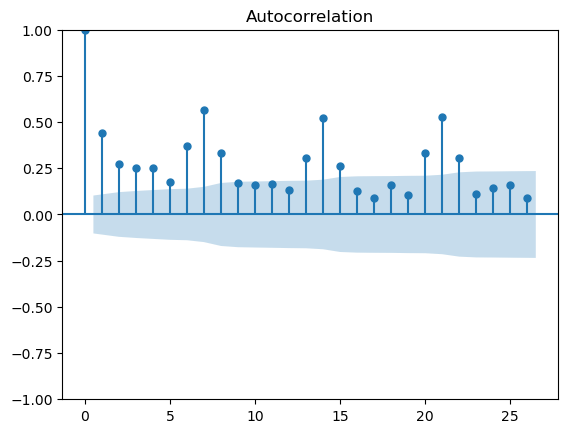

In [328]:
plot_pacf(train4.Crime_Count)
plot_acf(train4.Crime_Count)

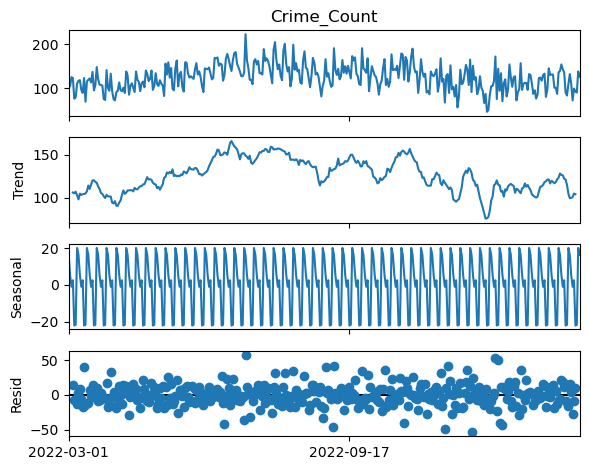

In [329]:
decomposition=seasonal_decompose(train4['Crime_Count'],model='additive',period=7)
decomposition.plot()
plt.xticks(ticks=range(0, len(train4), 200))
plt.show()

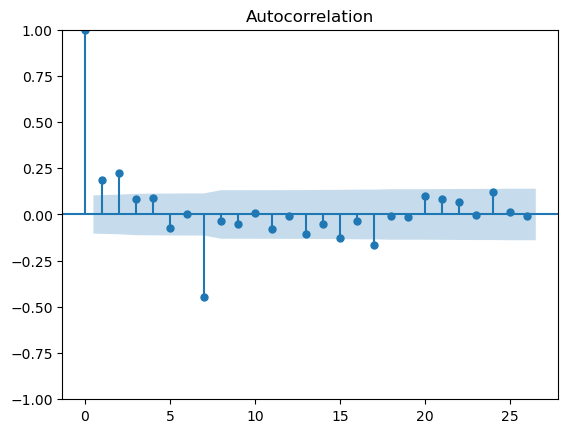

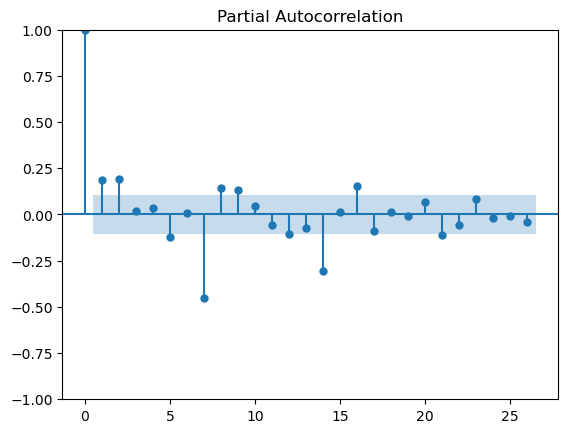

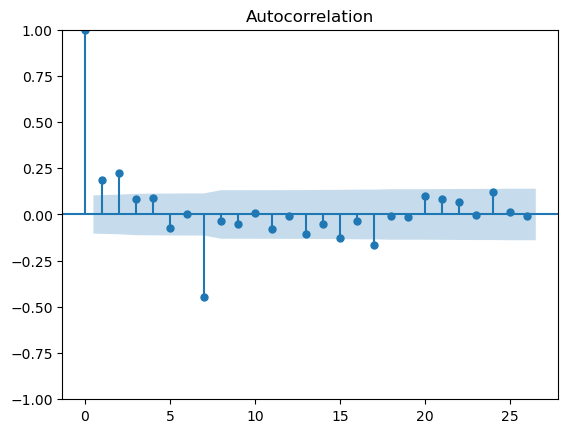

In [330]:
train4s1= train4.copy()
train4s1['Crime_Count']=train4['Crime_Count'] - train4['Crime_Count'].shift(7)
train4s1=train4s1.dropna()

plot_pacf(train4s1.Crime_Count)
plot_acf(train4s1.Crime_Count)

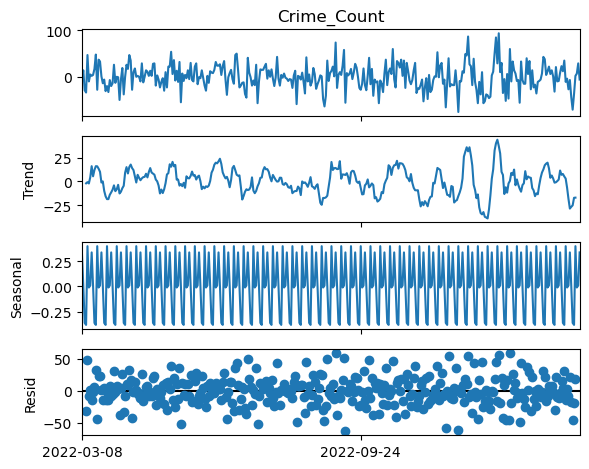

In [331]:
decomposition=seasonal_decompose(train4s1['Crime_Count'],model='additive',period=7)
decomposition.plot()
plt.xticks(ticks=range(0, len(train4s1), 200))
plt.show()

In [332]:
p = range(0, 3, 1)
d = 0
q = range(0, 4, 1)
P = range(0, 2, 1)
D = 1
Q = range(0, 2, 1)
s = 7

parameters = product(p, q, P, Q)
parameters_list = list(parameters)

result_df = optimize_SARIMA(parameters_list, d, D, s, train4s1['Crime_Count'])
result_df

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be 

(p,q)x(P,Q)          AIC
27  (1, 2, 1, 1)  3231.475037
31  (1, 3, 1, 1)  3231.795862
39  (2, 1, 1, 1)  3232.281696
23  (1, 1, 1, 1)  3233.299557
35  (2, 0, 1, 1)  3233.340232
43  (2, 2, 1, 1)  3234.569851
15  (0, 3, 1, 1)  3238.312712
11  (0, 2, 1, 1)  3243.428097
19  (1, 0, 1, 1)  3247.820858
7   (0, 1, 1, 1)  3255.777357
47  (2, 3, 1, 1)  3256.208458
3   (0, 0, 1, 1)  3271.436873
41  (2, 2, 0, 1)  3312.926702
45  (2, 3, 0, 1)  3314.887372
33  (2, 0, 0, 1)  3322.531128
37  (2, 1, 0, 1)  3324.383923
9   (0, 2, 0, 1)  3325.790381
13  (0, 3, 0, 1)  3326.838985
29  (1, 3, 0, 1)  3326.962122
21  (1, 1, 0, 1)  3327.292887
17  (1, 0, 0, 1)  3334.015775
5   (0, 1, 0, 1)  3337.648797
25  (1, 2, 0, 1)  3340.784653
1   (0, 0, 0, 1)  3344.572380
46  (2, 3, 1, 0)  3442.977765
30  (1, 3, 1, 0)  3471.395584
26  (1, 2, 1, 0)  3475.100543
34  (2, 0, 1, 0)  3475.407797
42  (2, 2, 1, 0)  3475.989790
38  (2, 1, 1, 0)  3476.037741
22  (1, 1, 1, 0)  3476.214852
14  (0, 3, 1, 0)  3478.241649
10  (0, 2, 1, 0)  3481.965221
18  (1, 0, 1, 0)  3483.931710
6   (0, 1, 1, 0)  3490.328249
2   (0, 0, 1, 0)  3505.758449
44  (2, 3, 0, 0)  3604.373940
36  (2, 1, 0, 0)  3645.474755
40  (2, 2, 0, 0)  3647.158155
32  (2, 0, 0, 0)  3666.401805
8   (0, 2, 0, 0)  3667.133908
24  (1, 2, 0, 0)  3669.133886
12  (0, 3, 0, 0)  3669.133893
28  (1, 3, 0, 0)  3671.011919
20  (1, 1, 0, 0)  3672.794861
16  (1, 0, 0, 0)  3676.169732
4   (0, 1, 0, 0)  3678.010793
0   (0, 0, 0, 0)  3680.852400

In [333]:
mod4 = SARIMAX(train4s1['Crime_Count'], order=(2,0,3), seasonal_order=(1,1,1,7)).fit(dis=-1)
my_model=SARIMAX(train4s1['Crime_Count'], order=(2, 0, 3), seasonal_order=(0, 1, 1, 7)).fit(dis=-1)
print(f'My Model AIC: {my_model.aic} and the Optimized Model AIC: {mod4.aic}')
print(mod4.summary())

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword argum

My Model AIC: 3314.8873719691956 and the Optimized Model AIC: 3256.2084579022635
                                      SARIMAX Results                                      
Dep. Variable:                         Crime_Count   No. Observations:                  358
Model:             SARIMAX(2, 0, 3)x(1, 1, [1], 7)   Log Likelihood               -1620.104
Date:                             Tue, 01 Apr 2025   AIC                           3256.208
Time:                                     16:55:06   BIC                           3287.095
Sample:                                 03-08-2022   HQIC                          3268.501
                                      - 02-28-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2087    

Figure(640x480)


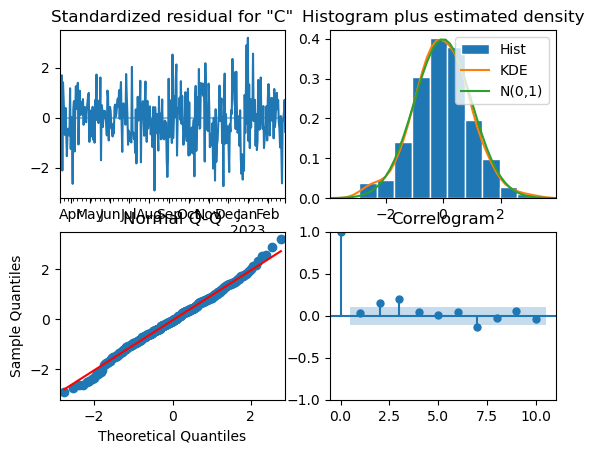

In [ ]:
print(mod4.plot_diagnostics(figsize=(10, 10)))

In [335]:
#FIT MODEL AND CALCULATE MSE
fcast_len = len(test4)
fcast = mod4.forecast(fcast_len)

mse4 = mean_squared_error(test4['Crime_Count'], fcast)
rmse4 = np.sqrt(mse4)
mae4 = mean_absolute_error(test4['Crime_Count'], fcast)
mape4= mean_absolute_percentage_error(test4['Crime_Count'], fcast)

print(f'Mean Squared Error: {mse4}')
print(f'Root Mean Squared Error: {rmse4}')
print(f'Mean Absolute Error: {mae4}')
print(f'Mean Absolute Percentage Error: {mape4}')

Mean Squared Error: 15452.12598877719
Root Mean Squared Error: 124.30658063343706
Mean Absolute Error: 122.5784503229169
Mean Absolute Percentage Error: 0.9949778726568914


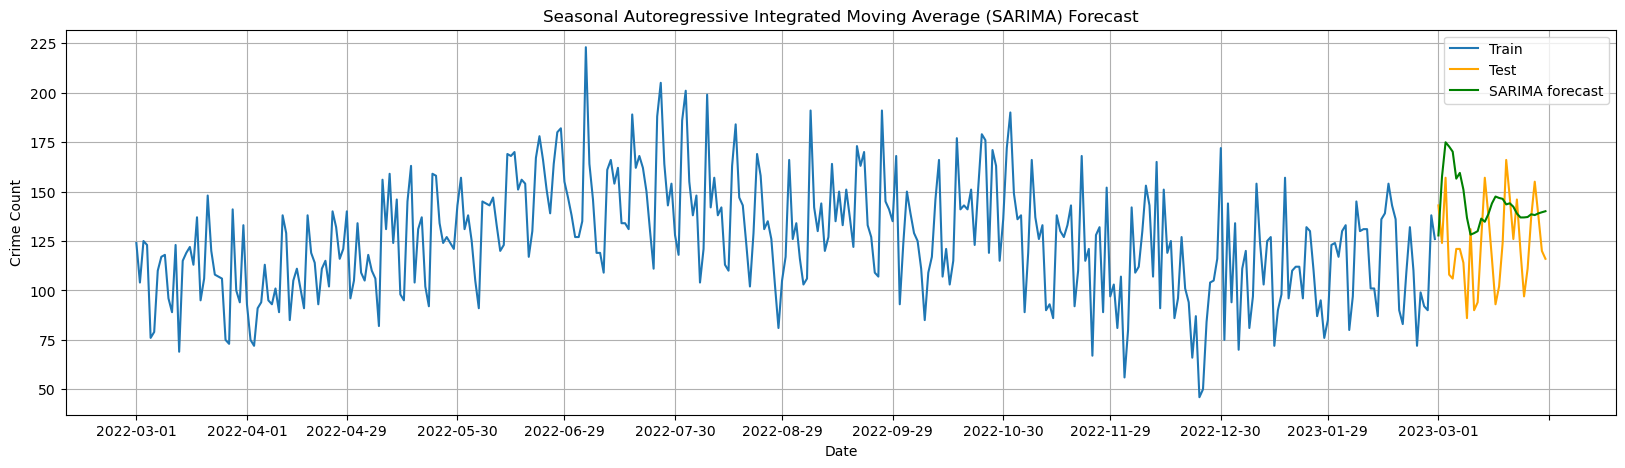

In [336]:
y_hat_sarima = test4.copy()
y_hat_sarima['sarima_forecast'] = fcast.values

# Reverse differencing: cumulatively sum and add back last known value
y_hat_sarima['sarima_forecast'] = train4['Crime_Count'].iloc[-7] + y_hat_sarima['sarima_forecast'].cumsum()

fig, ax=plt.subplots(figsize=(20, 5))
plt.grid(True)

# Plot the training data
plt.plot(train4['Crime_Count'], label='Train')

# Plot the test data
plt.plot(test4['Crime_Count'], label='Test', color='orange')

# Plot the SARIMA forecast for the test period
plt.plot(y_hat_sarima['sarima_forecast'], label='SARIMA forecast', color='green')

months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

plt.legend(loc='best')
plt.title('Seasonal Autoregressive Integrated Moving Average (SARIMA) Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')

# Show the plot
plt.show()

## REPEAT FOR STEP 5: Set 5

Text(0, 0.5, '\nNumber of Reported Crimes\n')

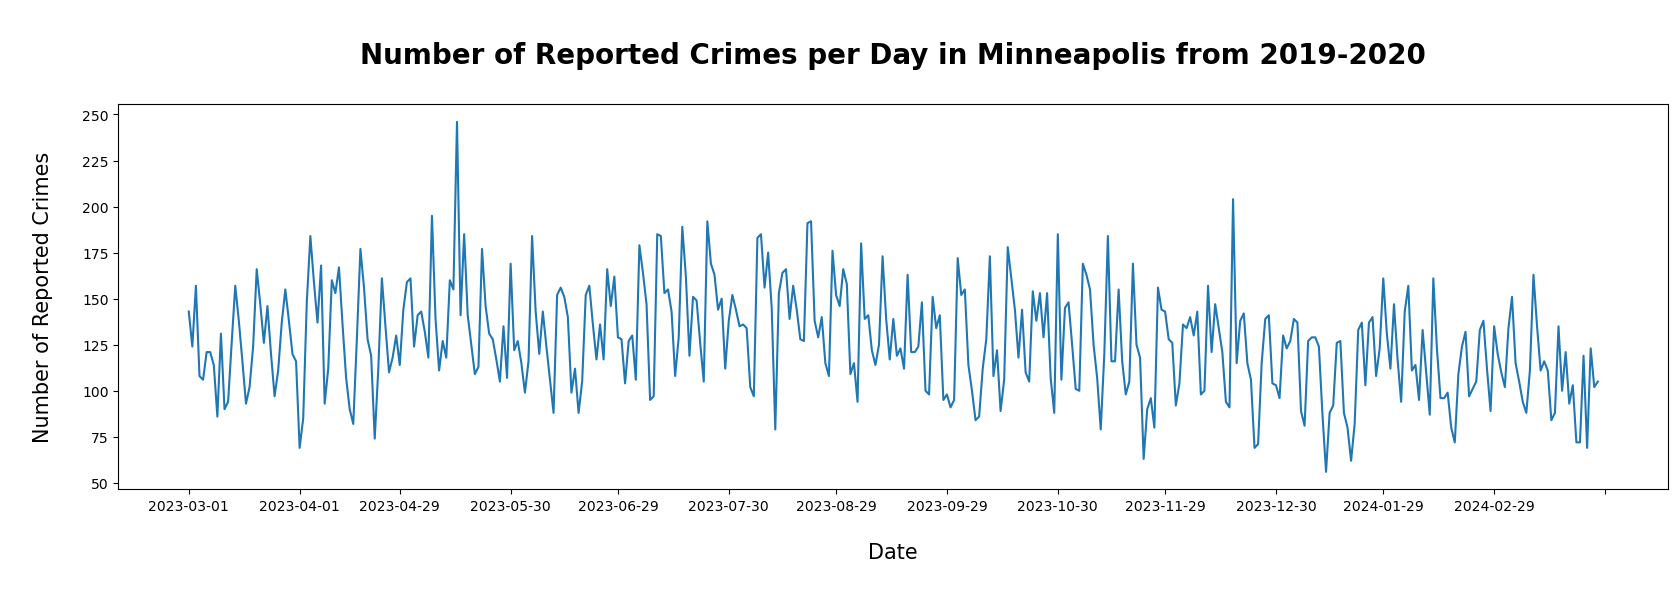

In [337]:
# #PLOT
ax.clear()
fig, ax=plt.subplots(figsize=(20, 5))
plt.plot(train5.Crime_Count); 
# plt.xticks(rotation=10, fontsize=15)

months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

ax.set_title("\nNumber of Reported Crimes per Day in Minneapolis from 2019-2020\n",weight='bold',fontdict={'fontsize':20})
ax.set_xlabel("\nDate\n",fontdict={'fontsize':15})
ax.set_ylabel("\nNumber of Reported Crimes\n",fontdict={'fontsize':15})



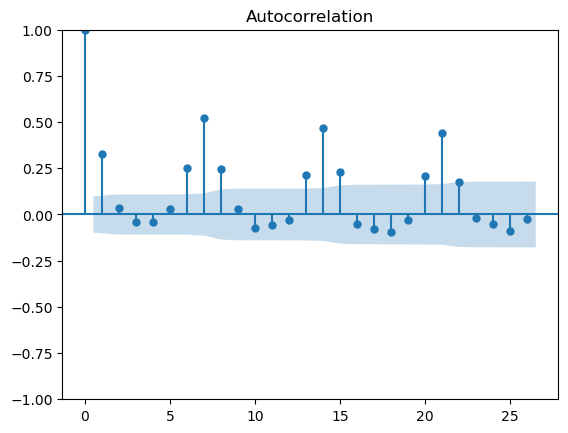

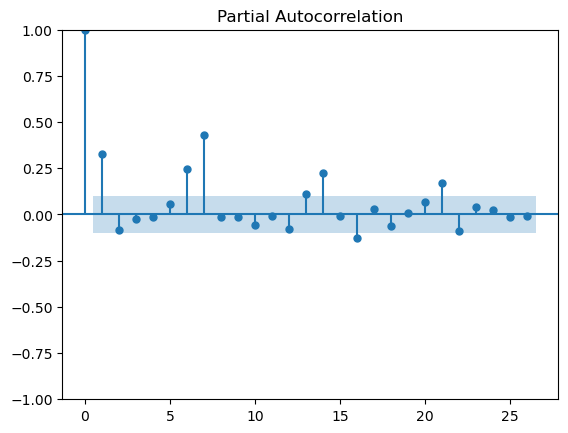

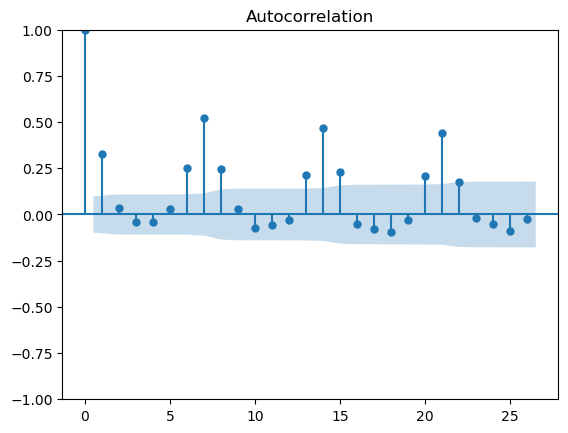

In [338]:
plot_pacf(train5.Crime_Count)
plot_acf(train5.Crime_Count)

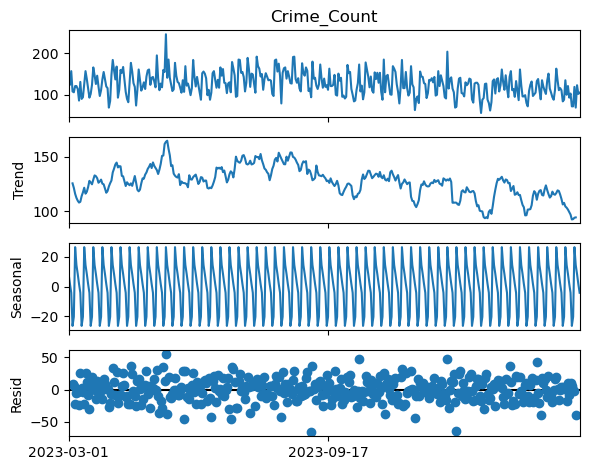

In [339]:
decomposition=seasonal_decompose(train5['Crime_Count'],model='additive',period=7)
decomposition.plot()
plt.xticks(ticks=range(0, len(train5), 200))
plt.show()

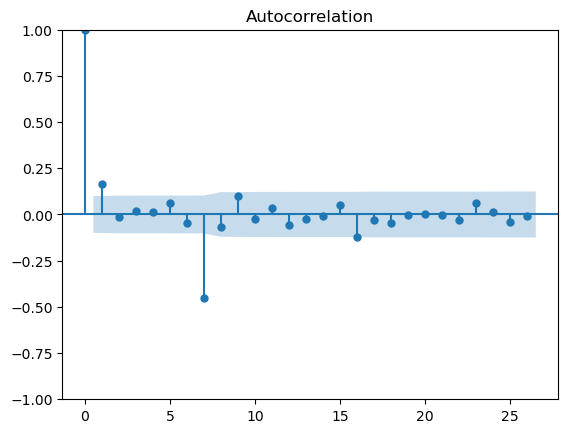

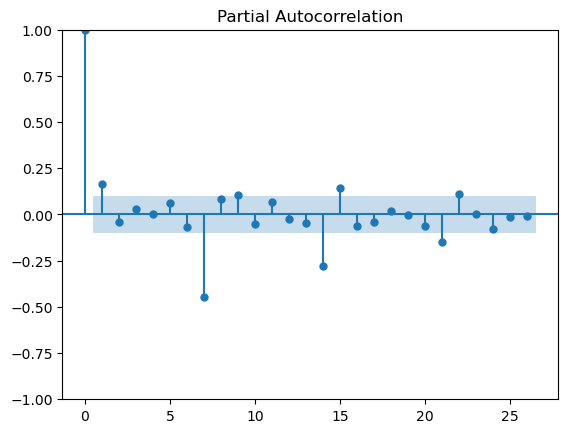

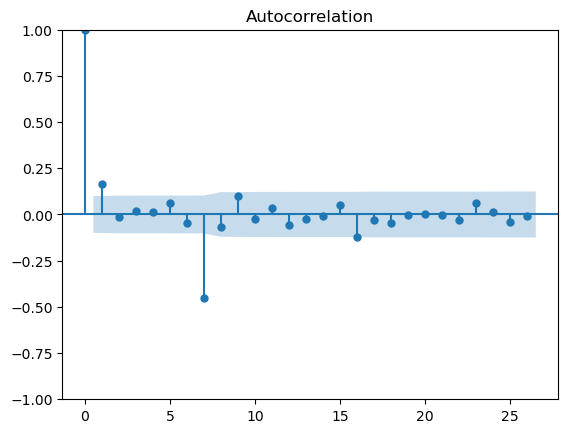

In [340]:
train5s1= train5.copy()
train5s1['Crime_Count']=train5['Crime_Count'] - train5['Crime_Count'].shift(7)
train5s1=train5s1.dropna()

plot_pacf(train5s1.Crime_Count)
plot_acf(train5s1.Crime_Count)

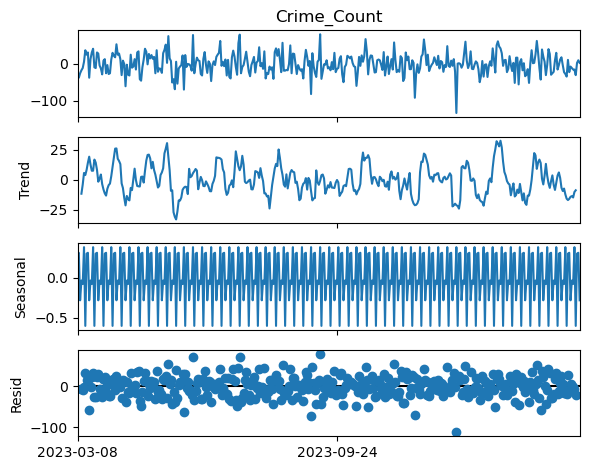

In [341]:
decomposition=seasonal_decompose(train5s1['Crime_Count'],model='additive',period=7)
decomposition.plot()
plt.xticks(ticks=range(0, len(train5s1), 200))
plt.show()

In [342]:
p = range(0, 3, 1)
d = 0
q = range(0, 4, 1)
P = range(0, 2, 1)
D = 1
Q = range(0, 2, 1)
s = 7

parameters = product(p, q, P, Q)
parameters_list = list(parameters)

result_df = optimize_SARIMA(parameters_list, d, D, s, train5s1['Crime_Count'])
result_df

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be 

(p,q)x(P,Q)          AIC
19  (1, 0, 1, 1)  3557.520865
43  (2, 2, 1, 1)  3558.215656
7   (0, 1, 1, 1)  3558.709564
23  (1, 1, 1, 1)  3558.857452
35  (2, 0, 1, 1)  3558.947798
11  (0, 2, 1, 1)  3559.076720
47  (2, 3, 1, 1)  3560.216083
39  (2, 1, 1, 1)  3560.683790
27  (1, 2, 1, 1)  3560.694365
15  (0, 3, 1, 1)  3561.065045
31  (1, 3, 1, 1)  3562.652919
3   (0, 0, 1, 1)  3568.071609
41  (2, 2, 0, 1)  3635.434551
29  (1, 3, 0, 1)  3636.655392
45  (2, 3, 0, 1)  3638.233277
5   (0, 1, 0, 1)  3639.258247
17  (1, 0, 0, 1)  3639.960728
21  (1, 1, 0, 1)  3641.052403
9   (0, 2, 0, 1)  3641.087898
33  (2, 0, 0, 1)  3641.280403
13  (0, 3, 0, 1)  3642.992969
25  (1, 2, 0, 1)  3643.039016
37  (2, 1, 0, 1)  3643.942478
1   (0, 0, 0, 1)  3648.245763
46  (2, 3, 1, 0)  3795.339287
22  (1, 1, 1, 0)  3804.022661
18  (1, 0, 1, 0)  3807.523744
6   (0, 1, 1, 0)  3807.931851
34  (2, 0, 1, 0)  3809.403805
10  (0, 2, 1, 0)  3809.440047
26  (1, 2, 1, 0)  3810.815429
38  (2, 1, 1, 0)  3810.978908
14  (0, 3, 1, 0)  3811.434124
30  (1, 3, 1, 0)  3813.360984
42  (2, 2, 1, 0)  3813.386633
2   (0, 0, 1, 0)  3813.521532
44  (2, 3, 0, 0)  3926.330837
8   (0, 2, 0, 0)  4012.724087
20  (1, 1, 0, 0)  4013.063975
4   (0, 1, 0, 0)  4013.257240
32  (2, 0, 0, 0)  4013.562012
36  (2, 1, 0, 0)  4014.629658
12  (0, 3, 0, 0)  4014.669689
24  (1, 2, 0, 0)  4014.685853
16  (1, 0, 0, 0)  4015.044157
28  (1, 3, 0, 0)  4016.650824
40  (2, 2, 0, 0)  4016.723968
0   (0, 0, 0, 0)  4021.306256

In [343]:
mod5 = SARIMAX(train5s1['Crime_Count'], order=(2,0,3), seasonal_order=(1,1,1,7)).fit(dis=-1)
my_model=SARIMAX(train5s1['Crime_Count'], order=(2, 0, 3), seasonal_order=(0, 1, 1, 7)).fit(dis=-1)
print(f'My Model AIC: {my_model.aic} and the Optimized Model AIC: {mod5.aic}')
print(mod5.summary())

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword argum

My Model AIC: 3638.2332769767168 and the Optimized Model AIC: 3560.2160831325896
                                      SARIMAX Results                                      
Dep. Variable:                         Crime_Count   No. Observations:                  388
Model:             SARIMAX(2, 0, 3)x(1, 1, [1], 7)   Log Likelihood               -1772.108
Date:                             Tue, 01 Apr 2025   AIC                           3560.216
Time:                                     16:55:41   BIC                           3591.758
Sample:                                 03-08-2023   HQIC                          3572.731
                                      - 03-29-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3960    

Figure(1000x1000)


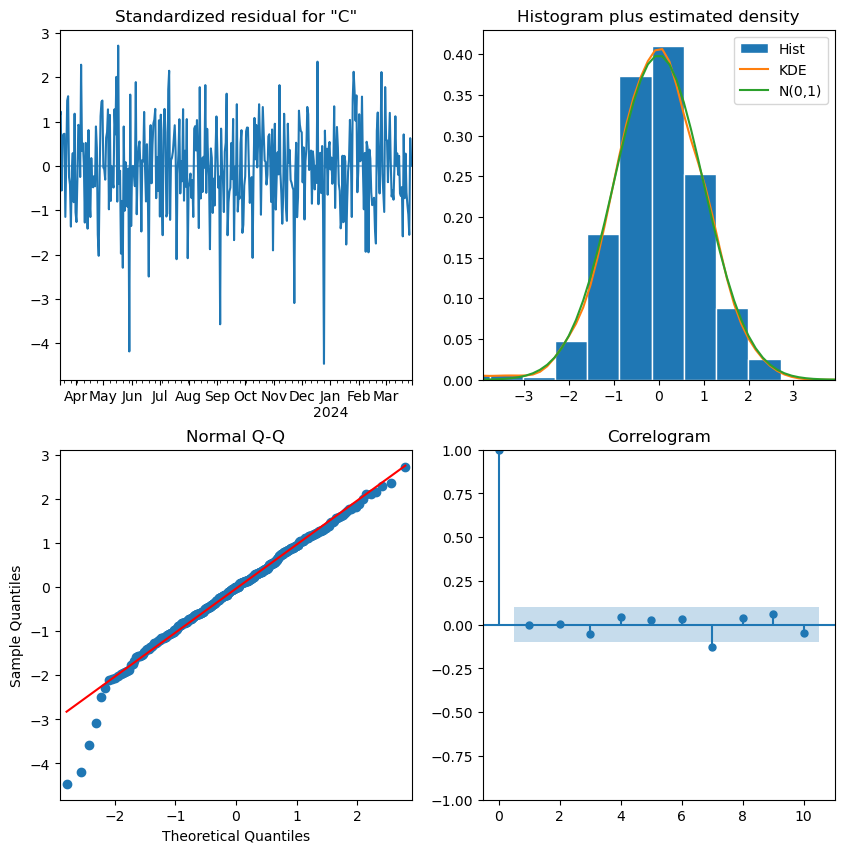

In [358]:
print(mod5.plot_diagnostics(figsize=(10, 10)))

In [345]:
#FIT MODEL AND CALCULATE MSE
fcast_len = len(test5)
fcast = mod5.forecast(fcast_len)

mse5 = mean_squared_error(test5['Crime_Count'], fcast)
rmse5 = np.sqrt(mse5)
mae5 = mean_absolute_error(test5['Crime_Count'], fcast)
mape5= mean_absolute_percentage_error(test5['Crime_Count'], fcast)

print(f'Mean Squared Error: {mse5}')
print(f'Root Mean Squared Error: {rmse5}')
print(f'Mean Absolute Error: {mae5}')
print(f'Mean Absolute Percentage Error: {mape5}')

Mean Squared Error: 11876.43734499871
Root Mean Squared Error: 108.97906838011926
Mean Absolute Error: 106.5622307911972
Mean Absolute Percentage Error: 0.999330286478921


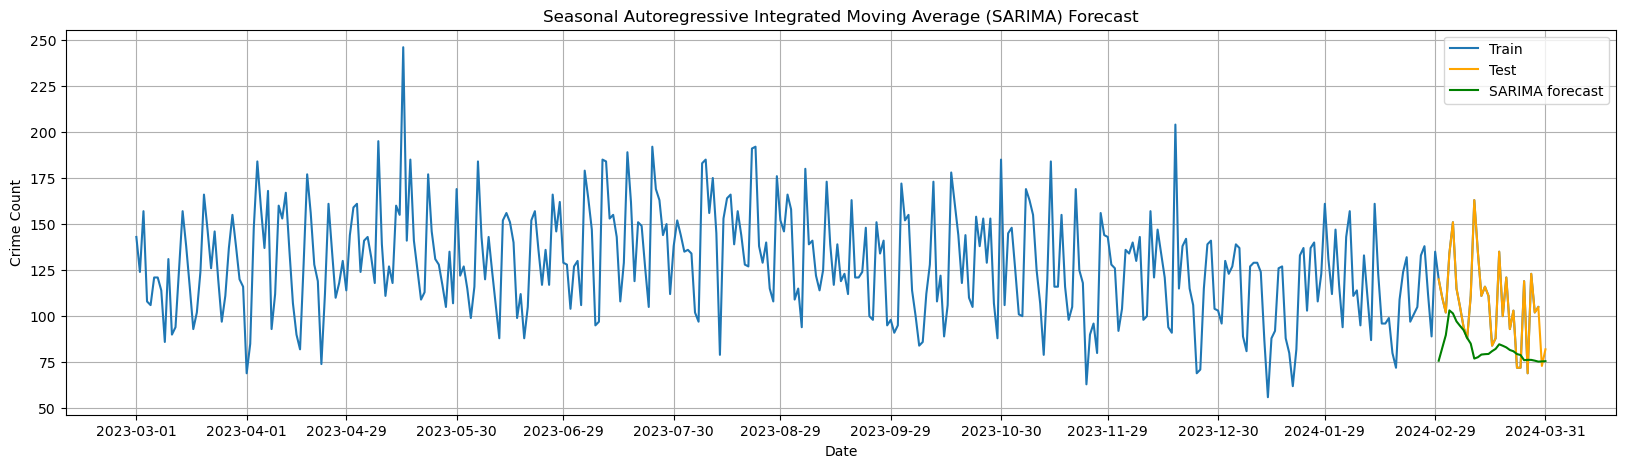

In [346]:
y_hat_sarima = test5.copy()
y_hat_sarima['sarima_forecast'] = fcast.values

# Reverse differencing: cumulatively sum and add back last known value
y_hat_sarima['sarima_forecast'] = train5['Crime_Count'].iloc[-7] + y_hat_sarima['sarima_forecast'].cumsum()

fig, ax=plt.subplots(figsize=(20, 5))
plt.grid(True)

# Plot the training data
plt.plot(train5['Crime_Count'], label='Train')

# Plot the test data
plt.plot(test5['Crime_Count'], label='Test', color='orange')

# Plot the SARIMA forecast for the test period
plt.plot(y_hat_sarima['sarima_forecast'], label='SARIMA forecast', color='green')

months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

plt.legend(loc='best')
plt.title('Seasonal Autoregressive Integrated Moving Average (SARIMA) Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')

# Show the plot
plt.show()

## COMPARE SARIMA MODELS

In [ ]:
#SARIMA Model
# initialize data of lists.
data = {'Model': ['Model_1', 'Model_2', 'Model_3', 'Model_4'],
        'SARIMA':['(2,0,3)(1,1,1,7)','(1,0,1)(1,1,1,7)','(2,0,3)(1,1,1,7)','(2,0,3)(1,1,1,7)'],
        'MSE': [mse1, mse2, mse3, mse4],
        'RMSE':[rmse1,rmse2,rmse3,rmse4],
        'MAE':[mae1,mae2,mae3,mae4],
        'MAPE':[mape1,mape2,mape3,mape4]}

# Create DataFrame
df = pd.DataFrame(data)

print(df)

NameError: name 'table' is not defined

## COMPARE TO AUTO SARIMA

In [348]:
#AUTO SARIMA
import pmdarima as pm
from pmdarima.arima import ADFTest
from pmdarima import auto_arima

## Test 1
# Seasonal - fit stepwise auto-ARIMA
SARIMA_model1 = pm.auto_arima(train1s1["Crime_Count"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=7, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

SARIMA_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  359
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 7)   Log Likelihood               -1629.716
Date:                           Tue, 01 Apr 2025   AIC                           3267.432
Time:                                   16:56:09   BIC                           3282.887
Sample:                               03-08-2019   HQIC                          3273.582
                                    - 02-29-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2412      0.052      4.608      0.000       0.139       0.344
ar.S.L7       -1.0676      0.045    -23.560      0.000      -1.156      -0.979
ar.S.L14      -0.5788      0.043    -13.352      0.000      -0.664      -0.494
sigma2       597.8654     41.169     14.522      0.000     517.177     678.554
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 5.29
Prob(Q):                              0.89   Prob(JB):                         0.07
Heteroskedasticity (H):               1.71   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [350]:
#FIT MODEL AND CALCULATE MSE
fcast = SARIMA_model1.predict(n_periods=len(test1))

mse5 = mean_squared_error(test1['Crime_Count'], fcast)
rmse5 = np.sqrt(mse5)
mae5 = mean_absolute_error(test1['Crime_Count'], fcast)
mape5= mean_absolute_percentage_error(test1['Crime_Count'], fcast)

print(f'Mean Squared Error: {mse5}')
print(f'Root Mean Squared Error: {rmse5}')
print(f'Mean Absolute Error: {mae5}')
print(f'Mean Absolute Percentage Error: {mape5}')

Mean Squared Error: 12823.55129663462
Root Mean Squared Error: 113.24112016681316
Mean Absolute Error: 110.3932922380649
Mean Absolute Percentage Error: 1.0175746944424602


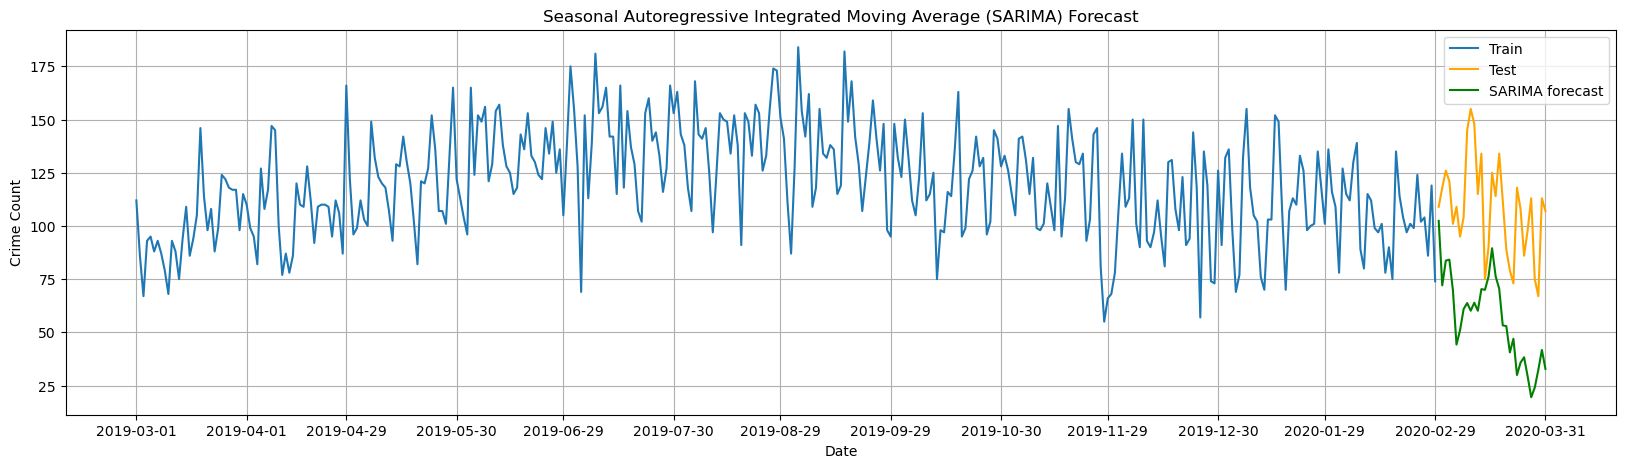

In [355]:
y_hat_sarima = test1.copy()
y_hat_sarima['sarima_forecast'] = fcast.values

# Reverse differencing: cumulatively sum and add back last known value
y_hat_sarima['sarima_forecast'] = train1['Crime_Count'].iloc[-7] + y_hat_sarima['sarima_forecast'].cumsum()

fig, ax=plt.subplots(figsize=(20, 5))
plt.grid(True)

# Plot the training data
plt.plot(train1['Crime_Count'], label='Train')

# Plot the test data
plt.plot(test1['Crime_Count'], label='Test', color='orange')

# Plot the SARIMA forecast for the test period
plt.plot(y_hat_sarima['sarima_forecast'], label='SARIMA forecast', color='green')

months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

plt.legend(loc='best')
plt.title('Seasonal Autoregressive Integrated Moving Average (SARIMA) Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')

# Show the plot
plt.show()



In [ ]:
#Train 2
SARIMA_model2 = pm.auto_arima(train2s1["Crime_Count"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=7, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

SARIMA_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1089
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 7)   Log Likelihood               -5033.411
Date:                            Wed, 19 Mar 2025   AIC                          10076.823
Time:                                    03:27:08   BIC                          10101.756
Sample:                                01-08-2019   HQIC                         10086.263
                                     - 12-31-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4815      0.117      4.130      0.000       0.253       0.710
ma.L1         -0.2726      0.126     -2.159      0.031      -0.520      -0.025
ar.S.L7       -1.0208      0.024    -41.895      0.000      -1.069      -0.973
ar.S.L14      -0.5322      0.025    -21.222      0.000      -0.581      -0.483
sigma2       637.7207     24.066     26.498      0.000     590.551     684.890
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                18.05
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                             0.04
Prob(H) (two-sided):                  0.41   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
fcast = SARIMA_model2.predict(n_periods=len(test2))

mse6 = mean_squared_error(test2, fcast)
rmse6 = np.sqrt(mse6)
mae6 = mean_absolute_error(test2, fcast)
mape6= mean_absolute_percentage_error(test2, fcast)

print(f'Mean Squared Error: {mse6}')
print(f'Root Mean Squared Error: {rmse6}')
print(f'Mean Absolute Error: {mae6}')
print(f'Mean Absolute Percentage Error: {mape6}')

Mean Squared Error: 16425.160054275748
Root Mean Squared Error: 128.16068060944335
Mean Absolute Error: 125.01729290588422
Mean Absolute Percentage Error: 1.0095824837812246


(0.0, 1461.0)

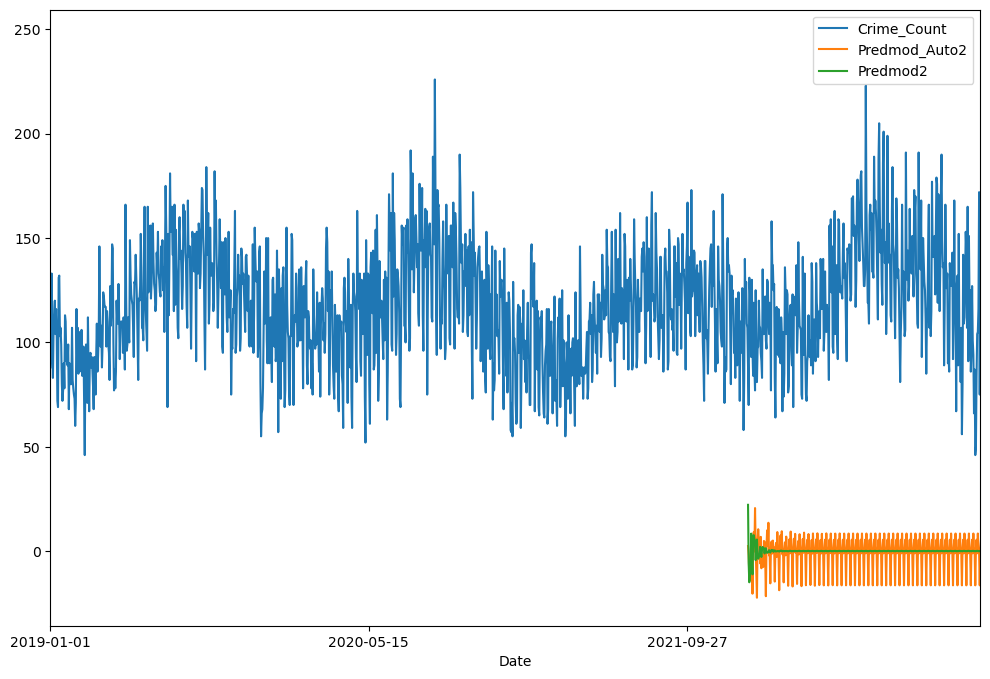

In [ ]:
unidf['Predmod_Auto2']=fcast
unidf[['Crime_Count','Predmod_Auto2','Predmod2']].plot(figsize=(12,8))
plt.xlim(0, len(train3))

In [ ]:
#Train 3
SARIMA_model3 = pm.auto_arima(train3s1["Crime_Count"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=7, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

SARIMA_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1454
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 7)   Log Likelihood               -6756.515
Date:                           Wed, 19 Mar 2025   AIC                          13525.029
Time:                                   03:38:36   BIC                          13556.693
Sample:                               01-08-2019   HQIC                         13536.846
                                    - 12-31-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2093      0.027      7.856      0.000       0.157       0.262
ar.L2          0.0813      0.028      2.867      0.004       0.026       0.137
ar.L3          0.0544      0.027      2.019      0.044       0.002       0.107
ar.S.L7       -1.0206      0.021    -48.587      0.000      -1.062      -0.979
ar.S.L14      -0.5473      0.021    -25.512      0.000      -0.589      -0.505
sigma2       661.5197     22.245     29.738      0.000     617.920     705.119
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                13.94
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.26   Skew:                             0.02
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
fcast = SARIMA_model3.predict(n_periods=len(test3))

mse7 = mean_squared_error(test3, fcast)
rmse7 = np.sqrt(mse7)
mae7 = mean_absolute_error(test3, fcast)
mape7= mean_absolute_percentage_error(test3, fcast)

print(f'Mean Squared Error: {mse7}')
print(f'Root Mean Squared Error: {rmse7}')
print(f'Mean Absolute Error: {mae7}')
print(f'Mean Absolute Percentage Error: {mape7}')

Mean Squared Error: 19378.153251497442
Root Mean Squared Error: 139.20543542368395
Mean Absolute Error: 135.80063803081845
Mean Absolute Percentage Error: 1.0655846683205503


(0.0, 1826.0)

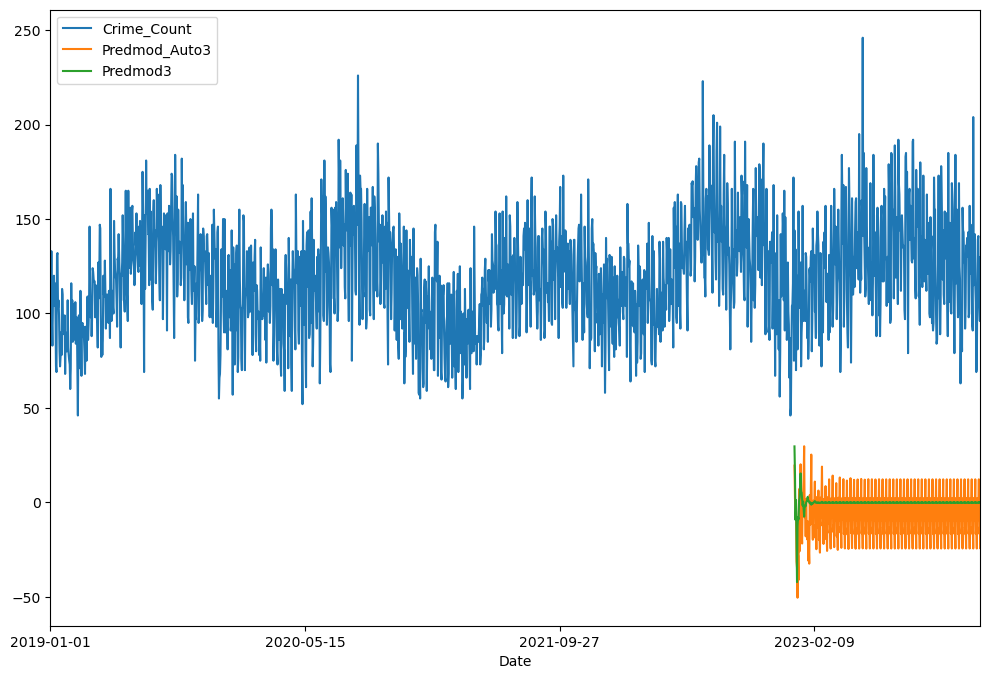

In [ ]:
unidf['Predmod_Auto3']=fcast
unidf[['Crime_Count','Predmod_Auto3','Predmod3']].plot(figsize=(12,8))
plt.xlim(0, len(train4))

In [ ]:
#Train 4
SARIMA_model4 = pm.auto_arima(train4s1["Crime_Count"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=7, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

SARIMA_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1819
Model:             SARIMAX(2, 0, 2)x(2, 1, [], 7)   Log Likelihood               -8487.919
Date:                            Wed, 19 Mar 2025   AIC                          16991.839
Time:                                    03:42:51   BIC                          17035.856
Sample:                                01-08-2019   HQIC                         17008.082
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0010      0.003     -0.291      0.771      -0.008       0.006
ar.L1          1.8657      0.021     87.515      0.000       1.824       1.908
ar.L2         -0.8929      0.020    -44.759      0.000      -0.932      -0.854
ma.L1         -1.7906      0.031    -57.603      0.000      -1.851      -1.730
ma.L2          0.7960      0.031     25.717      0.000       0.735       0.857
ar.S.L7       -1.0104      0.020    -51.128      0.000      -1.049      -0.972
ar.S.L14      -0.5139      0.020    -25.704      0.000      -0.553      -0.475
sigma2       693.8852     19.821     35.008      0.000     655.037     732.734
===================================================================================
Ljung-Box (L1) (Q):                   2.25   Jarque-Bera (JB):                60.62
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               1.44   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
fcast = SARIMA_model4.predict(n_periods=len(test4))

mse8 = mean_squared_error(test4, fcast)
rmse8 = np.sqrt(mse8)
mae8 = mean_absolute_error(test4, fcast)
mape8= mean_absolute_percentage_error(test4, fcast)

print(f'Mean Squared Error: {mse8}')
print(f'Root Mean Squared Error: {rmse8}')
print(f'Mean Absolute Error: {mae8}')
print(f'Mean Absolute Percentage Error: {mape8}')

Mean Squared Error: 17974.72204783589
Root Mean Squared Error: 134.06984018725424
Mean Absolute Error: 129.76570988510696
Mean Absolute Percentage Error: 1.0048691158353398


(0.0, 2261.0)

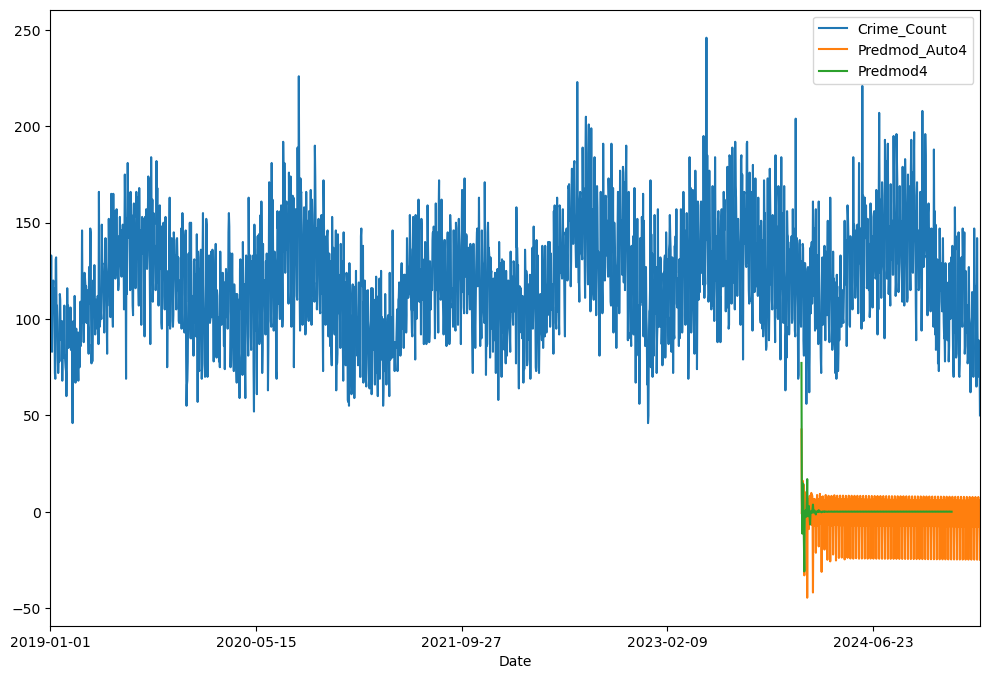

In [ ]:
unidf['Predmod_Auto4']=fcast
unidf[['Crime_Count','Predmod_Auto4','Predmod4']].plot(figsize=(12,8))
plt.xlim(0, len(unidf))

In [ ]:
#Model Comparison
data = {'Model': ['Model_1', 'Model_2', 'Model_3', 'Model_4'],
        'SARIMA':['(2,0,2)(2,1,0,7)','(1,0,1)(2,1,0,7)','(3,0,0)(2,1,0,7)','(2,0,2)(2,1,0,7)'],
        'MSE': [mse5, mse6, mse7, mse8],
        'RMSE':[rmse5,rmse6,rmse7,rmse8],
        'MAE':[mae5,mae6,mae7,mae8],
        'MAPE':[mape5,mape6,mape7,mape8]}

# Create DataFrame
df = pd.DataFrame(data)

print(df)

     Model            SARIMA           MSE        RMSE         MAE      MAPE
0  Model_1  (2,0,2)(2,1,0,7)  13490.582988  116.148969  113.494774  1.025491
1  Model_2  (1,0,1)(2,1,0,7)  16425.160054  128.160681  125.017293  1.009582
2  Model_3  (3,0,0)(2,1,0,7)  19378.153251  139.205435  135.800638  1.065585
3  Model_4  (2,0,2)(2,1,0,7)  17974.722048  134.069840  129.765710  1.004869


## COMPARE TO SARIMAX

In [ ]:
#SARIMAX

## FORECAST ALL FOR 2025

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-i

(0.0, 2598.0)

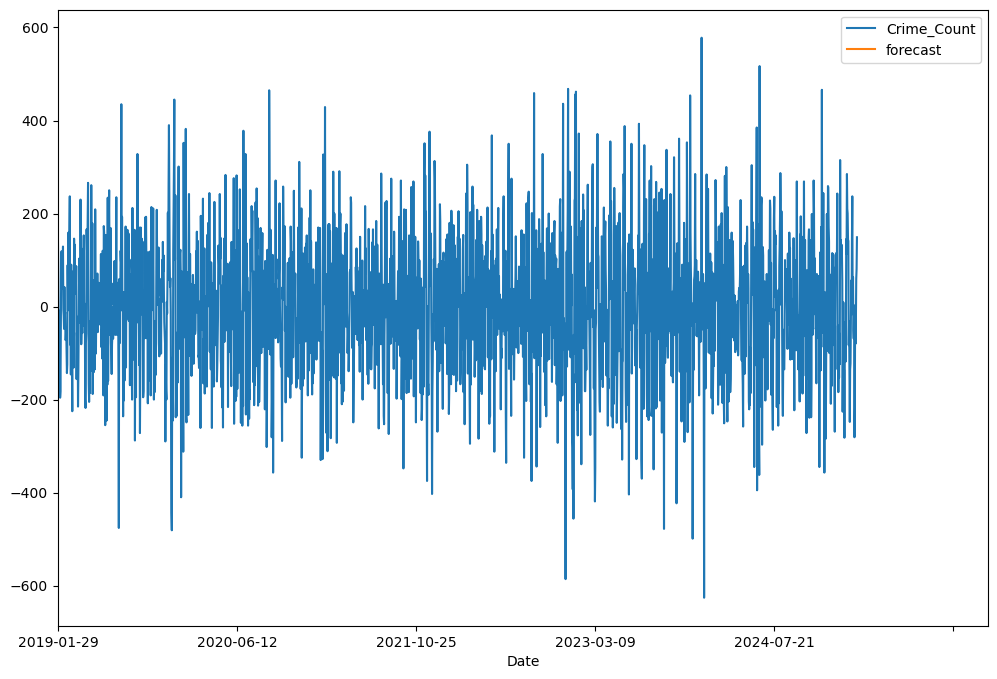

In [ ]:
#Difference
unidf1= unidf
unidf1['Crime_Count']=unidf['Crime_Count'] - unidf['Crime_Count'].shift(7)
unidf1=unidf1.dropna()

# Forecast 2025
best_mod = SARIMAX(unidf1['Crime_Count'], order=(2,0,3), seasonal_order=(1,1,1,7)).fit(dis=-1)
fcast = best_mod.forecast(365)
unidf1['forecast']=fcast
unidf1[['Crime_Count','forecast']].plot(figsize=(12,8))
plt.xlim(0, len(unidf1)+365)